In [11]:
#-----------------------------------Importing Datasets-------------------------------------------------------------

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [13]:
test_set_features = pd.read_csv("dengue_features_test.csv")
train_set_features = pd.read_csv("dengue_features_train.csv")
train_set_labels = pd.read_csv("dengue_labels_train.csv")

In [14]:
train_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [15]:
train_set_features.iloc[:, 3:].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [16]:
test_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [17]:
#--------------------------------Calculating NaN values for each Attribute-----------------------------------------

In [18]:
train_set_features.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [19]:
test_set_features.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

Text(0.5,0,'Time')

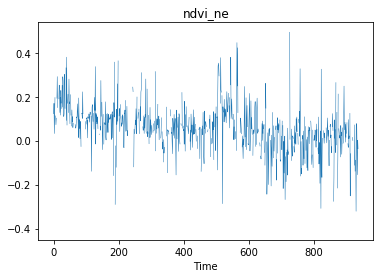

In [20]:
(train_set_features[train_set_features['city']=='sj']
     .ndvi_ne
     .plot
     .line(lw=0.5))

plt.title('ndvi_ne')
plt.xlabel('Time')

Text(0.5,0,'Time')

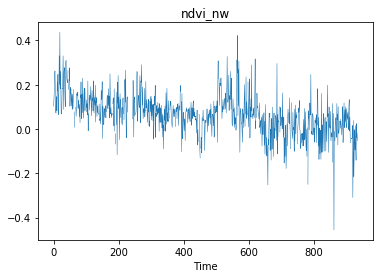

In [21]:
(train_set_features[train_set_features['city']=='sj']
     .ndvi_nw
     .plot
     .line(lw=0.5))

plt.title('ndvi_nw')
plt.xlabel('Time')

In [22]:
#---------------------------------------Filling Missing Values-----------------------------------------------------

In [23]:
train_set_features.fillna(method='ffill', inplace=True)
test_set_features.fillna(method='ffill', inplace=True)

In [24]:
#------------------------Seperating two cities to create seperate Models-------------------------------------------

In [25]:
sj_train_set_features = train_set_features[train_set_features['city']=='sj']
iq_train_set_features = train_set_features[train_set_features['city']=='iq']
sj_test_set_features = test_set_features[test_set_features['city']=='sj']
iq_test_set_features = test_set_features[test_set_features['city']=='iq']

In [26]:
sj_train_labels = train_set_labels[train_set_labels['city']=='sj']
iq_train_labels = train_set_labels[train_set_labels['city']=='iq']

In [27]:
sj_train_set_features['total_cases'] = sj_train_labels['total_cases']
iq_train_set_features['total_cases'] = iq_train_labels['total_cases']

/home/kusal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kusal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
sj_train_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [29]:
iq_train_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [30]:
#---------------------------------Correlation in city: SJ Attributes-----------------------------------------------

In [31]:
import seaborn as sns

Text(0.5,1,'San Juan Attribute Correlations')

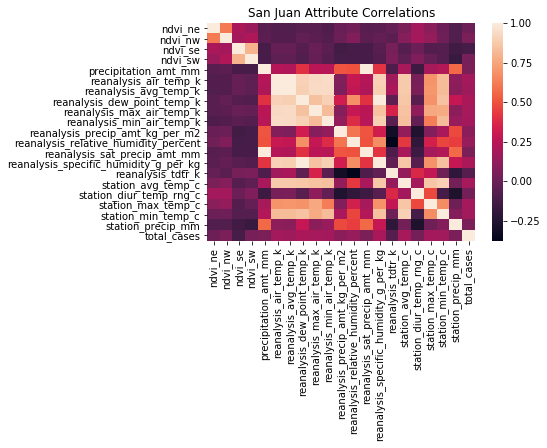

In [32]:
sj_correlations = sj_train_set_features.iloc[:,4:].corr()
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Attribute Correlations')

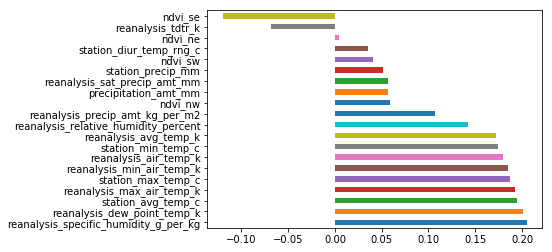

In [33]:
(sj_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [34]:
#---------------------------------Correlation in city: IQ Attributes-----------------------------------------------

Text(0.5,1,'Iquitos Attribute Correlations')

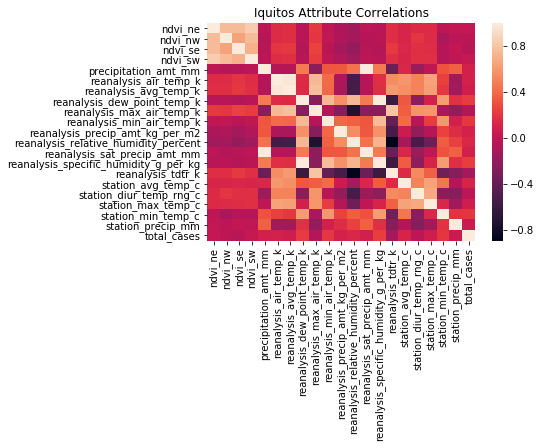

In [35]:
iq_correlations = iq_train_set_features.iloc[:,4:].corr()
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Attribute Correlations')

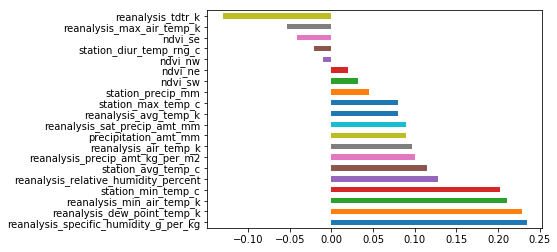

In [36]:
(iq_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [37]:
len(sj_train_set_features)

936

In [66]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

def feature_selection_rfe(features):
    sj_train_set = features
    sj_train_set = sj_train_set.drop(['city', 'week_start_date', 'ndvi_ne', 'year', 'weekofyear'], axis=1)

    X_set= sj_train_set.iloc[:,0:19].values
    y_set = sj_train_set.iloc[:, 19].values
    
    estimator = SVR(kernel='linear', verbose=5)
    
    selector = RFE(estimator, step=1)
    selector = selector.fit(X_set, y_set)
    
    res_dict = dict()
    columns = sj_train_set.columns

    for i in range(len(list(selector.ranking_))):
            res_dict[columns[i]] = selector.ranking_[i]
    return res_dict


In [67]:
print('SJ Rand Forest Feature Importance: ')
feature_selection_rfe(sj_train_set_features)

SJ Rand Forest Feature Importance: 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

{'ndvi_nw': 1,
 'ndvi_se': 3,
 'ndvi_sw': 4,
 'precipitation_amt_mm': 9,
 'reanalysis_air_temp_k': 6,
 'reanalysis_avg_temp_k': 1,
 'reanalysis_dew_point_temp_k': 1,
 'reanalysis_max_air_temp_k': 1,
 'reanalysis_min_air_temp_k': 1,
 'reanalysis_precip_amt_kg_per_m2': 8,
 'reanalysis_relative_humidity_percent': 7,
 'reanalysis_sat_precip_amt_mm': 11,
 'reanalysis_specific_humidity_g_per_kg': 1,
 'reanalysis_tdtr_k': 1,
 'station_avg_temp_c': 1,
 'station_diur_temp_rng_c': 1,
 'station_max_temp_c': 5,
 'station_min_temp_c': 2,
 'station_precip_mm': 10}

In [68]:
print('IQ Rand Forest Feature Importance: ')
feature_selection_rfe(iq_train_set_features)

IQ Rand Forest Feature Importance: 
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

{'ndvi_nw': 1,
 'ndvi_se': 1,
 'ndvi_sw': 1,
 'precipitation_amt_mm': 9,
 'reanalysis_air_temp_k': 1,
 'reanalysis_avg_temp_k': 1,
 'reanalysis_dew_point_temp_k': 1,
 'reanalysis_max_air_temp_k': 1,
 'reanalysis_min_air_temp_k': 1,
 'reanalysis_precip_amt_kg_per_m2': 10,
 'reanalysis_relative_humidity_percent': 2,
 'reanalysis_sat_precip_amt_mm': 11,
 'reanalysis_specific_humidity_g_per_kg': 1,
 'reanalysis_tdtr_k': 3,
 'station_avg_temp_c': 7,
 'station_diur_temp_rng_c': 6,
 'station_max_temp_c': 5,
 'station_min_temp_c': 4,
 'station_precip_mm': 8}

In [195]:
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from xgboost import plot_importance
from matplotlib import pyplot

def feature_selection_xgboost(features):
    sj_train_set = features
    sj_train_set = sj_train_set.drop(['city', 'week_start_date', 'ndvi_ne', 'year', 'weekofyear'], axis=1)

    X_set= sj_train_set.iloc[:,0:19].values
    y_set = sj_train_set.iloc[:, 19:20].values

    regressor = XGBRegressor(n_jobs=-1, random_state=1)

    max_depth = range(1,10)
    learning_rate = [0.1, 0.01, 0.001]
    n_estimators = range(0, 1000, 50)

    param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)

    grid_search = GridSearchCV(estimator = regressor, 
                               param_grid = param_grid, 
                               scoring="neg_mean_absolute_error", 
                               n_jobs=1,
                               refit=True, 
                               cv=KFold(5), 
                               verbose=5)
    grid_result = grid_search.fit(X=X_set, y=y_set)
    print("Best: Mean: %f, Std: %f using %s" % (grid_result.best_score_,
                                 grid_result.cv_results_['std_test_score'][grid_result.best_index_],
                                 grid_result.best_params_))
    
    max_depth = grid_result.best_params_['max_depth']
    learning_rate = grid_result.best_params_['learning_rate']
    n_estimators = grid_result.best_params_['n_estimators']
    
    regressor = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
                            n_jobs=-1, random_state=1)
    regressor.fit(X_set, y_set)
    return regressor

In [198]:
feature_reg = feature_selection_xgboost(iq_train_set_features)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-2.9903846153846154, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-5.971153846153846, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-10.76923076923077, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-7.423076923076923, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-9.096153846153847, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f300cb87208>>
Traceback (most recent call last):
  File "/home/kusal/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-7.078992967422192, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-7.391660128648464, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-5.792274972567191, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-7.3040928198741035, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-6.78370679800327, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-7.353391577418034, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[C

[CV]  learning_rate=0.1, max_depth=1, n_estimators=550, score=-8.277256029156538, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-6.926270998727817, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-8.086810904053541, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-8.038210332393646, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-6.305335241441544, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-8.37016109434458, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=650 ................

[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-7.906542608944269, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-7.424934084598835, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-5.824089820568378, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-7.7255030933481, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, score=-6.585913395938965, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, score=-7.993575580131549, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150 ................


[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-7.999277681112289, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-8.467255769727322, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-6.685542439612059, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-8.542525241867853, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=650, score=-7.302243440197064, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=650, score=-8.006938107025166, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=650 ...............

[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-8.12701898182814, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-8.198694919164364, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-7.306872097345499, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-8.325472937753567, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=150, score=-7.0836809157178955, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=150, score=-8.308783422868986, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ...............

[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-8.873992355970236, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-8.005955460266424, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-8.912472248650515, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=650, score=-7.589281591658409, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=650, score=-8.397577627060505, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=650, score=-8.867971493647648, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 ...............

[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-7.135039347868699, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-8.542694800175154, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-8.10912390339833, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-7.449225201916236, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-8.280357094338306, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=200, score=-7.191329366885698, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=200 ................

[CV]  learning_rate=0.1, max_depth=4, n_estimators=650, score=-7.30629686667369, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=650, score=-8.549017885270027, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=650, score=-8.342803812943972, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=650, score=-7.630780602876957, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=650, score=-8.36569170252635, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=700, score=-7.3066436390464125, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=700 ................

[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=-8.314224631740498, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=-6.983521766960621, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=-8.328627252807983, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, score=-7.0309856339142875, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, score=-9.012688058500107, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, score=-8.409447271090288, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ..............

[CV]  learning_rate=0.1, max_depth=5, n_estimators=650, score=-8.47277755003709, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=650, score=-7.021065364663418, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=650, score=-8.373845658623255, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=700, score=-7.047773688171919, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=700, score=-9.002681221526403, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=700, score=-8.472811161325527, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=700 ................

[CV]  learning_rate=0.1, max_depth=6, n_estimators=150, score=-6.2172726060335455, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=150, score=-8.372218189331202, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=-6.961687986667339, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=-8.30914957362872, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=-8.62846689642622, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=-6.227578363739527, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................

[CV]  learning_rate=0.1, max_depth=6, n_estimators=650, score=-6.2366838088402385, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=650, score=-8.379308205957596, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=700, score=-6.964329430976739, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=700, score=-8.306363473717983, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=700, score=-8.640407445625616, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=700, score=-6.2366838088402385, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 .............

[CV]  learning_rate=0.1, max_depth=7, n_estimators=150, score=-6.254304693868527, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=150, score=-8.716040895535397, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=-6.83158343571883, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=-8.764332778178728, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=-8.409605210217146, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=-6.260095971994675, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................

[CV]  learning_rate=0.1, max_depth=7, n_estimators=650, score=-6.260510697960854, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=650, score=-8.719378672540188, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=700, score=-6.832414981264335, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=700, score=-8.763770441023203, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=700, score=-8.413596672507433, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=700, score=-6.260510697960854, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ...............

[CV]  learning_rate=0.1, max_depth=8, n_estimators=150, score=-6.250169998751237, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=150, score=-8.877328501297878, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=-7.2297646059439735, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=-9.183820796700624, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=-8.33942430294477, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=-6.250549828203825, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ...............

[CV]  learning_rate=0.1, max_depth=8, n_estimators=650, score=-6.250623428477691, total=   0.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=650, score=-8.877015982109766, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=700, score=-7.229869820750677, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=700, score=-9.183656381872984, total=   0.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=700, score=-8.340244809881998, total=   0.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=700, score=-6.250623428477691, total=   0.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ...............

[CV]  learning_rate=0.1, max_depth=9, n_estimators=150, score=-6.424128977438579, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=150, score=-8.784763743671087, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=-7.3529031580457325, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=-9.284746574094662, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=-8.711870340200571, total=   0.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=-6.424401992788682, total=   0.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ..............

[CV]  learning_rate=0.1, max_depth=9, n_estimators=650, score=-6.424402530663288, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=650, score=-8.784740394411179, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=700, score=-7.352912247180939, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=700, score=-9.284753389369984, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=700, score=-8.712116662126322, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=700, score=-6.424402530663288, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ...............

[CV]  learning_rate=0.01, max_depth=1, n_estimators=150, score=-6.848209890035482, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-5.931047632144048, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-6.325825698100603, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-7.193268418312073, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-5.6448667874703045, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-6.936484942069421, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=250 .......

[CV]  learning_rate=0.01, max_depth=1, n_estimators=650, score=-5.797542840242386, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=650, score=-7.402079474467498, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-6.763680863838929, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-7.232648176642565, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-7.421293531472866, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-5.797658021633442, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ........

[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, score=-5.352960100540748, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, score=-6.909334127719585, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, score=-5.954070288401383, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, score=-6.821780766432102, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, score=-7.3067788412937755, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, score=-5.453047910561929, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 .......

[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-5.738742294219824, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-7.516542556194159, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=700, score=-6.6695212836448965, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=700, score=-7.801768780900882, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=700, score=-7.314932941244199, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=700, score=-5.7575370405729, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 .........

[CV]  learning_rate=0.01, max_depth=3, n_estimators=150, score=-7.416128860070155, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=150, score=-5.5474757838707704, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=150, score=-7.147078686035597, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, score=-5.756779862137941, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, score=-6.7563723383041525, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, score=-7.315569528020346, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ......

[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-8.09966668056754, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-7.60584157705307, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-7.115345189777704, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-7.84556246520235, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=700, score=-6.705165662444555, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=700, score=-8.14294424595741, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=700 ............

[CV]  learning_rate=0.01, max_depth=4, n_estimators=150, score=-5.692836157404459, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=150, score=-7.300102037879137, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-5.913221753560579, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-7.221843732091097, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-7.704746611989462, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-5.937728275473301, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ........

[CV]  learning_rate=0.01, max_depth=4, n_estimators=650, score=-7.839532259565133, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=650, score=-7.201507166028023, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=650, score=-7.959986138802308, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=700, score=-7.04357587144925, total=   0.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=700, score=-8.37900431912679, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=700, score=-7.84992803977086, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...........

[CV]  learning_rate=0.01, max_depth=5, n_estimators=150, score=-5.722905290814547, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=150, score=-7.59614378787004, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-5.4782347954236545, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-7.810474890929002, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-7.631153852893756, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-5.962649490970832, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ........

[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-7.864745519482172, total=   0.5s
[CV] learning_rate=0.01, max_depth=5, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-6.7256676990252275, total=   1.7s
[CV] learning_rate=0.01, max_depth=5, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-8.129215172277046, total=   1.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=700, score=-6.426138062889759, total=   0.7s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=700, score=-8.913169954258661, total=   0.7s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=700, score=-7.889505772636487, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 .......

[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-5.693367820519668, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-7.806582965529882, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, score=-5.807769791438029, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, score=-7.484380369003002, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, score=-7.669944905317747, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, score=-5.756777547299862, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ........

[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-7.797670328846345, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-6.178914699990016, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-8.224407779482695, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, score=-6.758699485888848, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, score=-8.670821875333786, total=   0.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, score=-7.807515622331546, total=   0.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ........

[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-6.979243021744948, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-7.895111409517435, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-5.7338995434916935, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-8.240490956948353, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, score=-6.015147770826633, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, score=-7.6894875054176035, total=   0.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ......

[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-7.042651574772138, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-8.924127923754545, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-8.181635462320768, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-6.161473291424604, total=   0.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-8.776076669876392, total=   0.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, score=-7.064133126002091, total=   0.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ........

[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-5.830856590316846, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-6.8764729133019085, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-7.812991484999657, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-5.904386803794366, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-8.36567347897933, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, score=-6.349030315302885, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ........

[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, score=-8.704467929899693, total=   0.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-7.336974321649625, total=   0.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-9.039445712016178, total=   0.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-8.301803185962713, total=   0.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-6.468936104900562, total=   0.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-8.715207116535076, total=   0.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ........

[CV]  learning_rate=0.01, max_depth=9, n_estimators=100, score=-5.802026012769113, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100, score=-8.219238043404543, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-6.0458254516124725, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-6.933396616807351, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-7.96804865449667, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-5.801579661380786, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ........

[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, score=-8.417735593250164, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, score=-6.143892192210142, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, score=-8.678842062560411, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-7.387080180530365, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-9.064062786790041, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-8.425197964677444, total=   1.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ........

[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-3.2202979578421664, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-5.354049766292939, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-9.975851291647324, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-6.6342166020320015, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-8.189422254378979, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=200, score=-3.3286610761514077, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=20

[CV]  learning_rate=0.001, max_depth=1, n_estimators=600, score=-7.103838083835749, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-4.201717787064039, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-5.060977752392109, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-8.229063387100513, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-5.516399725125386, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-7.063180412237461, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=700 .

[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, score=-9.984929479658604, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, score=-6.656096755312039, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, score=-8.215762787140333, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, score=-3.339300180856998, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, score=-5.265602288337854, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, score=-9.745770334051205, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 .

[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-5.341047814259162, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-8.299907723298439, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-5.4771704352819, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-7.122652278496669, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=700, score=-4.260420673168623, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=700, score=-5.410505231756431, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=700 ...

[CV]  learning_rate=0.001, max_depth=3, n_estimators=150, score=-5.428549658220548, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=150, score=-9.942462489582025, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=150, score=-6.665470517598665, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=150, score=-8.255421162797855, total=   0.3s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-3.326968941550988, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-5.349739323441799, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 .

[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-4.115089359191748, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-5.5069750513021765, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-8.289853766560555, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-5.510836637937105, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-7.278940401398218, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=700, score=-4.204639215882008, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=700 

[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-3.2432313595826807, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-5.390511931708226, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-9.954381158718697, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-6.6672349234039965, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-8.331943378425562, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=200, score=-3.3499486561004934, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20

[CV]  learning_rate=0.001, max_depth=4, n_estimators=600, score=-7.416039037016722, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-4.156514952962215, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-5.455368746931736, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-8.306081589597921, total=   0.4s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-5.717398265233407, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-7.370404035999225, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=700 .

[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=-8.603224158287048, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-3.267101576121954, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-5.4489390924572945, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-10.027944690332962, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-6.689771077953852, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-8.42440271893373, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=200 

[CV]  learning_rate=0.001, max_depth=5, n_estimators=600, score=-5.745623183365051, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=600, score=-7.691737690797219, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-4.152670294046402, total=   0.5s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-5.775242109711353, total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-8.38978119309132, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-5.701921997735133, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..

[CV]  learning_rate=0.001, max_depth=6, n_estimators=100, score=-6.944017745841008, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=100, score=-8.678309764426489, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-3.3028899540121737, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-5.4361346656313305, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-10.025388345408897, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-6.727988899900363, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=15

[CV]  learning_rate=0.001, max_depth=6, n_estimators=600, score=-8.532477465959696, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=600, score=-5.758732655300544, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=600, score=-8.004323711762062, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-4.292845995380328, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-5.67151371962749, total=   0.8s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-8.415090176348503, total=   1.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..

[CV]  learning_rate=0.001, max_depth=7, n_estimators=100, score=-6.9615877121686935, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=100, score=-8.700280950046503, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-3.3266586578236175, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-5.467519959578147, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-10.073543805342455, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-6.764231663770401, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=15

[CV]  learning_rate=0.001, max_depth=7, n_estimators=600, score=-8.595066549686285, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=600, score=-5.711683898591078, total=   0.6s
[CV] learning_rate=0.001, max_depth=7, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=600, score=-8.174572556064678, total=   1.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-4.375921323895454, total=   0.7s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-5.584232876507135, total=   0.6s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-8.485984556950056, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 .

[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-5.58498144035156, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-10.295988213844025, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-6.955484865663143, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-8.67632011266855, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-3.330067320798452, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-5.488755349642956, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..

[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-4.472211946375095, total=   0.6s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-5.644442754869278, total=   0.6s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-8.593530700756954, total=   0.5s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-5.801905828599747, total=   0.6s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-8.200655124794979, total=   0.7s
[CV] learning_rate=0.001, max_depth=8, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=650, score=-4.575307993934705, total=   0.6s
[CV] learning_rate=0.001, max_depth=8, n_estimators=650 .

[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-5.579791884296215, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-10.307358691038994, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-6.975812640041113, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-8.671699742858227, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-3.3523975564883304, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-5.474410938815429, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150

[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-4.540670626438581, total=   0.6s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-5.74333957897929, total=   0.6s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-8.642418222358593, total=   0.9s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-6.054941489146306, total=   0.6s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-8.154116237392792, total=   0.6s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-4.659028144696584, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed: 12.5min finished


[0.         0.         0.         0.         0.         0.
 0.         0.         0.29       0.         0.         0.
 0.6785714  0.         0.         0.         0.         0.03142857
 0.        ]


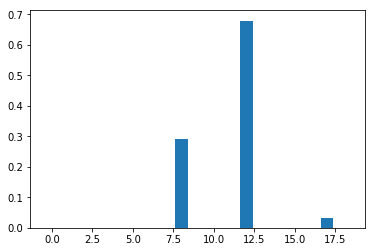

In [199]:
print(feature_reg.feature_importances_)
pyplot.bar(range(len(feature_reg.feature_importances_)), feature_reg.feature_importances_)
pyplot.show()

In [ ]:
feature_selection_xgboost(iq_train_set_features)

In [26]:
features_train = [ 'year','weekofyear','station_min_temp_c', 'reanalysis_dew_point_temp_k',
                  'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_precip_amt_kg_per_m2','total_cases']
features_test = [ 'year','weekofyear','station_min_temp_c', 'reanalysis_dew_point_temp_k',
                  'reanalysis_min_air_temp_k', 
                  'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2']

features_train_bench = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                      'station_avg_temp_c',
                      'station_min_temp_c','total_cases']
features_test_bench = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                      'station_avg_temp_c',
                      'station_min_temp_c']

In [27]:
sj_train_set = sj_train_set_features[features_train]
sj_test_set = sj_test_set_features[features_test]
iq_train_set = iq_train_set_features[features_train]
iq_test_set = iq_test_set_features[features_test]

sj_train_set_bench = sj_train_set_features[features_train_bench]
sj_test_set_bench = sj_test_set_features[features_test_bench]
iq_train_set_bench = iq_train_set_features[features_train_bench]
iq_test_set_bench = iq_test_set_features[features_test_bench]

In [28]:
sj_train_set.head()

,year,weekofyear,station_min_temp_c,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,total_cases
0,1990,18,20.0,292.414286,295.9,14.012857,32.00,4
1,1990,19,22.2,293.951429,296.4,15.372857,17.94,5
2,1990,20,22.8,295.434286,297.3,16.848571,26.10,4
3,1990,21,23.3,295.310000,297.0,16.672857,13.90,3
4,1990,22,23.9,295.821429,297.5,17.210000,12.20,6


In [29]:
sj_test_set.head()

,year,weekofyear,station_min_temp_c,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2
0,2008,18,21.7,294.527143,296.4,15.918571,25.37
1,2008,19,22.2,294.395714,296.7,15.791429,21.83
2,2008,20,22.8,295.308571,296.4,16.674286,4.12
3,2008,21,24.4,294.402857,296.9,15.775714,2.20
4,2008,22,23.3,294.760000,297.3,16.137143,4.36


In [30]:
sj_t = sj_train_set.iloc[:,2:7].rolling(window=50, min_periods=1).mean()
iq_t = iq_train_set.iloc[:,2:7].rolling(window=70, min_periods=1).mean()

sj_tt = sj_test_set.iloc[:,2:7].rolling(window=50, min_periods=1).mean()
iq_tt = iq_test_set.iloc[:,2:7].rolling(window=70, min_periods=1).mean()

sj_bench_t = sj_train_set_bench.iloc[:,0:4].rolling(window=30, min_periods=1).mean()
iq_bench_t = iq_train_set_bench.iloc[:,0:4].rolling(window=30, min_periods=1).mean()

sj_bench_tt = sj_test_set_bench.iloc[:,0:4].rolling(window=30, min_periods=1).mean()
iq_bench_tt = iq_test_set_bench.iloc[:,0:4].rolling(window=30, min_periods=1).mean()

In [31]:
iq_train_set.head()

,year,weekofyear,station_min_temp_c,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,total_cases
936,2000,26,20.7,295.184286,293.1,16.651429,43.19,0
937,2000,27,20.8,295.358571,291.1,16.862857,46.00,0
938,2000,28,20.7,295.622857,292.6,17.120000,64.77,0
939,2000,29,14.7,292.797143,288.6,14.431429,23.96,0
940,2000,30,19.1,293.957143,291.5,15.444286,31.80,0


In [32]:
sj_test_set.head()

,year,weekofyear,station_min_temp_c,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2
0,2008,18,21.7,294.527143,296.4,15.918571,25.37
1,2008,19,22.2,294.395714,296.7,15.791429,21.83
2,2008,20,22.8,295.308571,296.4,16.674286,4.12
3,2008,21,24.4,294.402857,296.9,15.775714,2.20
4,2008,22,23.3,294.760000,297.3,16.137143,4.36


In [33]:
sj_t.columns = ['moving_station_min_temp_c', 'moving_reanalysis_dew_point_temp_k', 
                'moving_reanalysis_min_air_temp_k',
               'moving_reanalysis_specific_humidity_g_per_kg',
               'moving_reanalysis_precip_amt_kg_per_m2']
iq_t.columns = ['moving_station_min_temp_c', 'moving_reanalysis_dew_point_temp_k', 
                'moving_reanalysis_min_air_temp_k',
               'moving_reanalysis_specific_humidity_g_per_kg',
               'moving_reanalysis_precip_amt_kg_per_m2']
sj_tt.columns = ['moving_station_min_temp_c', 'moving_reanalysis_dew_point_temp_k', 
                 'moving_reanalysis_min_air_temp_k',
               'moving_reanalysis_specific_humidity_g_per_kg',
                'moving_reanalysis_precip_amt_kg_per_m2']
iq_tt.columns = ['moving_station_min_temp_c', 'moving_reanalysis_dew_point_temp_k', 
                 'moving_reanalysis_min_air_temp_k',
               'moving_reanalysis_specific_humidity_g_per_kg',
                'moving_reanalysis_precip_amt_kg_per_m2']

sj_bench_t.columns = ['moving_reanalysis_specific_humidity_g_per_kg', 'moving_reanalysis_dew_point_temp_k', 
                      'moving_station_avg_temp_c',
                      'moving_station_min_temp_c']
iq_bench_t.columns = ['moving_reanalysis_specific_humidity_g_per_kg', 'moving_reanalysis_dew_point_temp_k', 
                      'moving_station_avg_temp_c',
                      'moving_station_min_temp_c']
sj_bench_tt.columns = ['moving_reanalysis_specific_humidity_g_per_kg', 'moving_reanalysis_dew_point_temp_k', 
                      'moving_station_avg_temp_c',
                      'moving_station_min_temp_c']
iq_bench_tt.columns = ['moving_reanalysis_specific_humidity_g_per_kg', 'moving_reanalysis_dew_point_temp_k', 
                      'moving_station_avg_temp_c',
                      'moving_station_min_temp_c']

In [34]:
sj_train_set = pd.concat((sj_train_set.iloc[:,0:7], sj_t, sj_train_set.iloc[:, 7]), axis=1)
iq_train_set = pd.concat((iq_train_set.iloc[:,0:7], iq_t, iq_train_set.iloc[:, 7]), axis=1)

sj_test_set = pd.concat((sj_test_set, sj_tt), axis=1)
iq_test_set = pd.concat((iq_test_set, iq_tt), axis=1)

#sj_train_set = pd.concat((sj_train_set_bench.iloc[:,0:4], sj_bench_t, sj_train_set_bench.iloc[:, 4]), axis=1)
#iq_train_set = pd.concat((iq_train_set_bench.iloc[:,0:4], iq_bench_t, iq_train_set_bench.iloc[:, 4]), axis=1)

#sj_test_set = pd.concat((sj_test_set_bench, sj_bench_tt), axis=1)
#iq_test_set = pd.concat((iq_test_set_bench, iq_bench_tt), axis=1)

In [35]:
iq_train_set.head()

,year,weekofyear,station_min_temp_c,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,moving_station_min_temp_c,moving_reanalysis_dew_point_temp_k,moving_reanalysis_min_air_temp_k,moving_reanalysis_specific_humidity_g_per_kg,moving_reanalysis_precip_amt_kg_per_m2,total_cases
936,2000,26,20.7,295.184286,293.1,16.651429,43.19,20.700000,295.184286,293.100000,16.651429,43.190,0
937,2000,27,20.8,295.358571,291.1,16.862857,46.00,20.750000,295.271429,292.100000,16.757143,44.595,0
938,2000,28,20.7,295.622857,292.6,17.120000,64.77,20.733333,295.388571,292.266667,16.878095,51.320,0
939,2000,29,14.7,292.797143,288.6,14.431429,23.96,19.225000,294.740714,291.350000,16.266429,44.480,0
940,2000,30,19.1,293.957143,291.5,15.444286,31.80,19.200000,294.584000,291.380000,16.102000,41.944,0


In [36]:
iq_test_set.head()

,year,weekofyear,station_min_temp_c,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,moving_station_min_temp_c,moving_reanalysis_dew_point_temp_k,moving_reanalysis_min_air_temp_k,moving_reanalysis_specific_humidity_g_per_kg,moving_reanalysis_precip_amt_kg_per_m2
260,2010,26,21.5,296.118571,293.7,17.654286,34.11,21.500000,296.118571,293.700,17.654286,34.110000
261,2010,27,21.2,294.831429,292.2,16.320000,9.10,21.350000,295.475000,292.950,16.987143,21.605000
262,2010,28,21.6,296.417143,292.5,18.030000,61.09,21.433333,295.789048,292.800,17.334762,34.766667
263,2010,29,14.2,293.638571,289.3,15.394286,19.60,19.625000,295.251429,291.925,16.849643,30.975000
264,2010,30,16.9,293.892857,290.5,15.468571,18.93,19.080000,294.979714,291.640,16.573429,28.566000


In [37]:
#--------------------------------------XGBoost Regression----------------------------------------------------------

In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

def xgb_regressor_model(X_train, y_train):
    regressor = XGBRegressor(n_jobs=-1, random_state=1)

    max_depth = range(1,10)
    learning_rate = [0.1, 0.01, 0.001]
    n_estimators = range(0, 1000, 50)

    param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)

    grid_search = GridSearchCV(estimator = regressor, 
                               param_grid = param_grid, 
                               scoring="neg_mean_absolute_error", 
                               n_jobs=1,
                               refit=True, 
                               cv=KFold(5), 
                               verbose=5)
    grid_result = grid_search.fit(X=X_train, y=y_train)
    print("Best: Mean: %f, Std: %f using %s" % (grid_result.best_score_,
                                 grid_result.cv_results_['std_test_score'][grid_result.best_index_],
                                 grid_result.best_params_))
    
    return grid_result
    

In [39]:
from sklearn.model_selection import train_test_split

sj_X_train, sj_X_test, sj_y_train, sj_y_test = train_test_split(sj_train_set.iloc[:,0:12].values, 
                                                                sj_train_set.iloc[:,12].values,
                                                               test_size = 0.2, random_state = 1)
iq_X_train, iq_X_test, iq_y_train, iq_y_test = train_test_split(iq_train_set.iloc[:,0:12].values, 
                                                                iq_train_set.iloc[:,12].values,
                                                               test_size = 0.2, random_state = 1)

In [40]:
sj_model_xgboost = xgb_regressor_model(X_train=sj_X_train, y_train=sj_y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-32.42, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-34.64, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-32.526666666666664, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-36.40604026845637, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-30.828859060402685, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-23.782833672209875, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, score=-20.09871880160082, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-19.628235272566478, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-21.132233152389528, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-20.855815113385518, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-23.308489925909363, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ............

[CV]  learning_rate=0.1, max_depth=1, n_estimators=550, score=-19.460306745767593, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=550 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=550, score=-22.05066428088502, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=550 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=550, score=-21.23430835480658, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-19.636929027636846, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-20.707897412379584, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, score=-19.401911563475927, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600 ...........

[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=-15.127105630238852, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=-18.257890787700678, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=-15.971226112954568, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-13.944331737756729, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-16.692721459070842, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=-13.102550704081853, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ............

[CV]  learning_rate=0.1, max_depth=2, n_estimators=550, score=-12.178468847672145, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=550 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=550, score=-13.235935383795091, total=   0.7s
[CV] learning_rate=0.1, max_depth=2, n_estimators=550 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=550, score=-13.979378253421528, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-11.959654641946157, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-13.748163827260335, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, score=-12.193698008457819, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600 .........

[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-11.241543768246968, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-12.766797329755438, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=-14.105822518367896, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=150, score=-12.32159946123759, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=150, score=-13.275084300041199, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=150, score=-10.891547202467919, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=150 ..........

[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-12.438211950461069, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-11.299364700317383, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-11.598723588973884, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, score=-13.449541901782055, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=650, score=-11.707756371100743, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=650, score=-12.419721238613128, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=650 .........

[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, score=-12.791538066864014, total=   0.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, score=-9.667504275639851, total=   0.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, score=-10.776601919391812, total=   0.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, score=-12.998747864025551, total=   0.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-10.640656220118204, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=150, score=-12.66151780764262, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=150 ...........

[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, score=-10.549754240512847, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, score=-12.321976557970046, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, score=-9.331009293397267, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, score=-10.08691631707569, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, score=-12.719063040394111, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=650, score=-10.553485817114511, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=650 ...........

[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=-10.686446091334025, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=-12.076169989903768, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=-9.218915824890138, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=-11.94175451553908, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=-11.8236769669808, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=-10.633860875765482, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=150 .............

[CV]  learning_rate=0.1, max_depth=5, n_estimators=550, score=-11.573312813803653, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, score=-10.562011620203654, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, score=-11.741883198420206, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, score=-9.24334423104922, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, score=-11.753030894986734, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, score=-11.57423183901998, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=650 ............

[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=-10.258536111513774, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=-11.384939699172973, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=-9.799295558929444, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=-11.456392661837123, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=-12.108942510297634, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=150, score=-10.259277325471242, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=150 ..........

[CV]  learning_rate=0.1, max_depth=6, n_estimators=550, score=-12.223671882744604, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=600, score=-10.22752484957377, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=600, score=-11.396166733105977, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=600, score=-9.680328545967738, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=600, score=-11.35733562027848, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=600, score=-12.224171620887399, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=650 ............

[CV]  learning_rate=0.1, max_depth=7, n_estimators=50, score=-13.1419071303118, total=   0.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=-10.268774675528208, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=-11.93509488105774, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=-9.838415162960688, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=-11.73507373124961, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=-12.941290868208712, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=150 ...............

[CV]  learning_rate=0.1, max_depth=7, n_estimators=550, score=-11.670196981238039, total=   0.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=550 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=550, score=-12.8722149797734, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=600, score=-10.242705731391906, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=600, score=-11.942273721694946, total=   0.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=600, score=-9.94408426920573, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=600, score=-11.670237190771424, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 .............

[CV]  learning_rate=0.1, max_depth=8, n_estimators=50, score=-12.54649839785275, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=-10.170254955291748, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=-12.390233124891918, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=-9.933043700456619, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=-10.643789043362508, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=-12.60665675777717, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=150 .............

[CV]  learning_rate=0.1, max_depth=8, n_estimators=550, score=-10.596719073769231, total=   0.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=550 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=550, score=-12.593016990879239, total=   0.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=600, score=-10.175607143243154, total=   0.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=600, score=-12.381350112756094, total=   0.6s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=600, score=-10.020710301001866, total=   0.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=600, score=-10.59671895375988, total=   0.6s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ..........

[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=-10.12665158589681, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=-12.272128992080688, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=-9.878614610036214, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=-10.912129460565195, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=-12.158521848236955, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=150, score=-10.139662156105041, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=150 ...........

[CV]  learning_rate=0.1, max_depth=9, n_estimators=550, score=-12.169320851364391, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=600, score=-10.13599934498469, total=   0.4s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=600, score=-12.282675020694732, total=   0.4s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=600, score=-9.881409373283386, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=600, score=-10.897280281822153, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=600, score=-12.169320729754915, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=650 ...........

[CV]  learning_rate=0.01, max_depth=1, n_estimators=150, score=-22.595787208352313, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=150, score=-19.84412161935896, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-20.766998920440674, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-22.14197521209717, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-21.898191000620525, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, score=-23.118619912422744, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200 ....

[CV]  learning_rate=0.01, max_depth=1, n_estimators=650, score=-21.631421972910562, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=650, score=-23.56878758316872, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=650, score=-19.788372101799755, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-20.172750876744587, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-21.887401666641235, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=700, score=-21.496251893043517, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=700 ...

[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, score=-19.93666016896566, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, score=-17.80077185312907, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, score=-19.353738855195527, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, score=-17.82094655260944, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, score=-17.111680774688722, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, score=-19.8509241549174, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200 .......

[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-14.612179700930913, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-17.376467484633128, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-14.300202566782634, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-17.772829271802966, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=650, score=-15.530669725181273, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=700, score=-14.482456661860148, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=700 ..

[CV]  learning_rate=0.01, max_depth=3, n_estimators=150, score=-15.959113203684488, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=150, score=-17.596515527507602, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=150, score=-16.52841904979424, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, score=-15.249903704325359, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, score=-17.772658770879108, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, score=-15.179408219655356, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...

[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-14.844433530171711, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-11.841900594234467, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-14.177009675326763, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=650, score=-14.220844910448829, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=700, score=-12.861326705614726, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=700, score=-14.632017834981282, total=   0.5s
[CV] learning_rate=0.01, max_depth=3, n_estimators=700 ..

[CV]  learning_rate=0.01, max_depth=4, n_estimators=150, score=-16.71769771319908, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=150, score=-15.525580979033604, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-13.122167514165243, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-16.21316867828369, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-13.339026193618775, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=200, score=-15.580114220612801, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=200 ....

[CV]  learning_rate=0.01, max_depth=4, n_estimators=650, score=-10.532837274869284, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=650, score=-12.750890885423495, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=650, score=-13.292740053778527, total=   0.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=700, score=-11.125646554629007, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=700, score=-13.28964299360911, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=700, score=-10.411665070851644, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=700 ...

[CV]  learning_rate=0.01, max_depth=5, n_estimators=150, score=-13.668416792551676, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=150, score=-15.981075123652516, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=150, score=-14.38700512751637, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-12.182060934702555, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-15.15134160041809, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=-12.590758021672567, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ....

[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-12.277886465390523, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-9.90593479792277, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-11.90226380457014, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=650, score=-12.235337340591737, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=700, score=-10.473646453221638, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=700, score=-12.213843355178833, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=700 .....

[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-12.787098549207052, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-15.152537655830383, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-12.54410005569458, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-14.974392334086783, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=150, score=-14.587388158644606, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, score=-11.545803691546123, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...

[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, score=-12.771428409038775, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-10.433564537366232, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-11.216928367614747, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-9.964999769528706, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-11.57844313199088, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=650, score=-12.730068528412172, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ....

[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-12.355171248118083, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-14.733419240315754, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-12.166810126304627, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-14.86966229365176, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=150, score=-14.406386794659916, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, score=-11.095406696001689, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...

[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, score=-13.170318587514378, total=   0.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-10.395694727897643, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-11.88570257504781, total=   0.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-9.991859999497732, total=   0.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-11.00266398999515, total=   0.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=650, score=-13.160579473380274, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 .....

[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-12.244722075462342, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-15.125504557291666, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-11.87404687245687, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-15.095977026344146, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, score=-13.923271646435628, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, score=-10.988658834298452, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...

[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, score=-12.75092705464203, total=   0.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-10.072233602205912, total=   0.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-12.09670483827591, total=   0.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-10.440286951859791, total=   0.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-10.665652180678093, total=   0.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=650, score=-12.754156741519902, total=   0.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ....

[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-12.163053135077158, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-14.96692454179128, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-11.906060565312703, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-15.222752878329898, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=150 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=150, score=-14.082332017437723, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, score=-10.859120314915975, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...

[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, score=-12.858193080697284, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-10.036149473985036, total=   0.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-12.00881491502126, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-10.170601825714112, total=   0.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-10.753784094880892, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=650 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=650, score=-12.878435114886136, total=   0.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...

[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-30.544477984110515, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-27.917721659342448, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-31.968460561445095, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=150, score=-26.896382402253632, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=200, score=-27.479224332173665, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=200, score=-29.368617000579835, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators

[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-23.284264767964682, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-21.926255601247153, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-24.4156530495458, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=650, score=-20.910411572296347, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=700, score=-22.209066333770753, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=700, score=-22.99727413813273, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=70

[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, score=-27.982901970545452, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, score=-31.58081257903336, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, score=-26.82486038079998, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, score=-27.296053449312847, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, score=-29.166283394495647, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, score=-26.750797214508058, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=2

[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-22.180128622055054, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-20.39772508621216, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-22.468364008321057, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=650, score=-20.261466759163262, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=700, score=-20.8142950852712, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=700, score=-21.773466704686484, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=70

[CV]  learning_rate=0.001, max_depth=3, n_estimators=150, score=-26.559432239340456, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-26.814831153551737, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-29.238929080963135, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-26.905107564926148, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-30.379771739844507, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=-25.604406135994317, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators

[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-22.545780341897235, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=650, score=-20.169987982551522, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=700, score=-19.74487195332845, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=700, score=-21.86327500661214, total=   0.5s
[CV] learning_rate=0.001, max_depth=3, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=700, score=-19.367563880284628, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=700, score=-21.98910935933158, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=70

[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-28.081017905871075, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-31.74050586015586, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, score=-26.68518191536001, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=200, score=-26.848631278673807, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=200, score=-29.231516893704732, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=200, score=-26.80657710870107, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20

[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-21.89643909136454, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-18.939942792256673, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-22.604310339729256, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=650, score=-19.43635478435747, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=700, score=-19.08633866628011, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=700, score=-21.294775482813517, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=70

[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-30.579584330717722, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-28.059670883019766, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-31.852685099480137, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=150, score=-26.771814175900197, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200, score=-27.07009676615397, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200, score=-29.41664737065633, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=2

[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-18.987418214480083, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-22.092333726882934, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-18.568507846196493, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-22.04709896145251, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=650, score=-19.654906106475217, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=700, score=-18.431564081509908, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=

[CV]  learning_rate=0.001, max_depth=6, n_estimators=100, score=-27.90828455414548, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-28.41177444299062, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-30.493643526236216, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-27.866849245230355, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-31.917929924574473, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=150, score=-26.847251985697138, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=2

[CV]  learning_rate=0.001, max_depth=6, n_estimators=600, score=-22.549447938099803, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=600, score=-19.762242442809494, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-19.066552208264667, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-21.68681957244873, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-17.440676557223004, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=650, score=-21.819835861257257, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=

[CV]  learning_rate=0.001, max_depth=7, n_estimators=100, score=-28.065540990173417, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-28.48968959768613, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-30.435696896711985, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-27.93299907286962, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-32.01178448752269, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=150, score=-27.06236701643707, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=200

[CV]  learning_rate=0.001, max_depth=7, n_estimators=600, score=-22.870494330489397, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=600, score=-19.879729406145596, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-19.03211939414342, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-21.423371013800303, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-17.774209939638773, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-22.163586184482448, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=

[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-29.492452001571657, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-33.4191267606396, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=100, score=-28.102341131875978, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-28.554365735054017, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-30.544461692969005, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-28.100967380603155, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=1

[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-22.149454708099366, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-19.00924345811208, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-23.209554277810476, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=600, score=-19.94536062775042, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=650, score=-19.110681926409402, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=650, score=-21.352594374020896, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=6

[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-29.555789425373078, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-33.468474430525866, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=100 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100, score=-28.11152159447638, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-28.528112016121547, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-30.56644976337751, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-28.19370015144348, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, n_estimators=15

[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-22.190731048583984, total=   0.5s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-19.065981403191884, total=   0.5s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-23.359740141254143, total=   0.6s
[CV] learning_rate=0.001, max_depth=9, n_estimators=600 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=600, score=-20.06961502404821, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-19.260944259166717, total=   0.5s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-21.38923484325409, total=   0.5s
[CV] learning_rate=0.001, max_depth=9, n_estimators=6

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed: 11.2min finished


In [41]:
sj_y_test_pred_xgboost = sj_model_xgboost.predict(sj_X_test)
mae_sj = mean_absolute_error(sj_y_test, sj_y_test_pred_xgboost)
print('SJ Mean: '+ str(mae_sj))

SJ Mean: 12.565519793870601


In [42]:
iq_model_xgboost = xgb_regressor_model(X_train=iq_X_train, y_train=iq_y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-7.583333333333333, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-8.801204819277109, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-9.367469879518072, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-5.090361445783133, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=0 ..................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=0, score=-7.957831325301205, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=1, n_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=-6.537488985492523, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=-5.637081153336025, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=-6.605922917285597, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=-6.743637579392238, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=-5.260781469115292, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=-6.648664999439056, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ...............

[CV]  learning_rate=0.1, max_depth=1, n_estimators=650, score=-6.505048655242805, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=650, score=-5.82726425291544, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=650 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=650, score=-6.714581993329956, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=700, score=-5.4200554223997255, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=700, score=-6.433675025241921, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=700 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=700, score=-6.486055271094104, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=700 ...............

[CV]  learning_rate=0.1, max_depth=2, n_estimators=200, score=-6.745495640728847, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=250, score=-4.3699632198328064, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=250, score=-5.29460162606584, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=250, score=-5.700388429035623, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=250, score=-5.381597301328038, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=250, score=-6.8684272191610685, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=300 ..............

[CV]  learning_rate=0.1, max_depth=2, n_estimators=750, score=-5.442058407039528, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=750 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=750, score=-5.707340914082814, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=750 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=750, score=-5.623053401349539, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=750 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=750, score=-6.957239360694426, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=800, score=-4.637552257804644, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=800, score=-5.460368162537196, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=800 ...............

[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, score=-4.975192843790514, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, score=-5.444258222019816, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=-4.58114876349767, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=-4.278406325233988, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=-5.653056303420699, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=-5.022001759474536, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................

[CV]  learning_rate=0.1, max_depth=3, n_estimators=750, score=-5.196170502398387, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=750 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=750, score=-5.656696477209229, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=800, score=-4.6375347418444495, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=800, score=-4.217890043574643, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=800, score=-5.744560293404453, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=800, score=-5.19532403924379, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=800 ...............

[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, score=-5.028381059327757, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, score=-5.348112891596484, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=300, score=-4.532627534653459, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=300, score=-4.261160527367189, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=300, score=-5.977241867637059, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=300, score=-5.02177301264671, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................

[CV]  learning_rate=0.1, max_depth=4, n_estimators=750, score=-5.01654867019998, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=750 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=750, score=-5.373081517865859, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=800, score=-4.52879170860563, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=800, score=-4.282641688384206, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=800, score=-6.004175278436707, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=4, n_estimators=800, score=-5.016235484057162, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=800 ................


[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, score=-4.546005740223161, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, score=-4.934804839901178, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, score=-4.543746936888922, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, score=-3.666654399001455, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, score=-5.961926476423999, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, score=-4.5448325409228545, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300 ..............

[CV]  learning_rate=0.1, max_depth=5, n_estimators=750, score=-4.937455451991185, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=800, score=-4.539196442990076, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=800, score=-3.6759916026908233, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=800, score=-5.964481411210025, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=800, score=-4.545657387339925, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=800, score=-4.937437281910196, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=850 ..............

[CV]  learning_rate=0.1, max_depth=6, n_estimators=300, score=-5.157043733767101, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=300, score=-3.9971324058182267, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=300, score=-6.306782296623092, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=300, score=-4.155063825917531, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=300, score=-4.777741846909006, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=350, score=-5.157032709391344, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=350 ..............

[CV]  learning_rate=0.1, max_depth=6, n_estimators=800, score=-5.15660816040777, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=800, score=-3.996474681848503, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=800, score=-6.306560984577041, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=800, score=-4.15563338923167, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=800, score=-4.777400687516454, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=850 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=850, score=-5.15660816040777, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=850 ................
[

[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, score=-5.358612131149996, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, score=-3.8862819915794464, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, score=-6.524656439402017, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, score=-3.922581428863916, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, score=-4.544631687273462, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=350, score=-5.358536679475081, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=350 ..............

[CV]  learning_rate=0.1, max_depth=7, n_estimators=800, score=-3.8859548888292657, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=800, score=-6.52455771759332, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=800, score=-3.922528684498316, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=800, score=-4.544660110430545, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=850 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=850, score=-5.358549990114712, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=850 ................
[CV]  learning_rate=0.1, max_depth=7, n_estimators=850, score=-3.8859548888292657, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=850 ..............

[CV]  learning_rate=0.1, max_depth=8, n_estimators=300, score=-6.637868511030473, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=300, score=-3.6315684358039535, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=300, score=-4.648840276950813, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=350, score=-5.743562770386537, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=350, score=-3.7106634744678635, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=350, score=-6.637868544782501, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=350 .............

[CV]  learning_rate=0.1, max_depth=8, n_estimators=800, score=-3.7106635268912256, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=800, score=-6.637868547655014, total=   0.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=800, score=-3.631568512643676, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=800, score=-4.648840161691229, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=850 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=850, score=-5.743562763290746, total=   0.6s
[CV] learning_rate=0.1, max_depth=8, n_estimators=850 ................
[CV]  learning_rate=0.1, max_depth=8, n_estimators=850, score=-3.7106635268912256, total=   0.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=850 .............

[CV]  learning_rate=0.1, max_depth=9, n_estimators=300, score=-3.6385668017059922, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=300, score=-6.6742059864911685, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=300, score=-3.9104878672634262, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=300, score=-4.223096625273486, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=350, score=-5.881503761169457, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=350 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=350, score=-3.6385668336626993, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=350 ...........

[CV]  learning_rate=0.1, max_depth=9, n_estimators=800, score=-5.8815037579763505, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=800, score=-3.6385668394077255, total=   0.4s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=800, score=-6.674206049686455, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=800, score=-3.910487900297326, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=800, score=-4.223096676260592, total=   0.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=850 ................
[CV]  learning_rate=0.1, max_depth=9, n_estimators=850, score=-5.8815037579763505, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=850 ............

[CV]  learning_rate=0.01, max_depth=1, n_estimators=300, score=-5.031217273459377, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=300, score=-6.489560075553067, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=350, score=-5.725625773270925, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=350, score=-6.668088315481163, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=350, score=-7.042835213333728, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=350, score=-5.049687027931213, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=350 ........

[CV]  learning_rate=0.01, max_depth=1, n_estimators=800, score=-6.4957537256091475, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=850, score=-5.722191820542018, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=850, score=-6.592744073953973, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=850, score=-6.867430925010199, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=850, score=-5.077616934675768, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=850, score=-6.50305234452328, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=900 ........

[CV]  learning_rate=0.01, max_depth=2, n_estimators=300, score=-6.073861724281886, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=350, score=-5.141350661005292, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=350, score=-5.76908645356994, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=350, score=-6.292239444442542, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=350, score=-4.773971149720341, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=350, score=-6.146693013877754, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=400 .........

[CV]  learning_rate=0.01, max_depth=2, n_estimators=800, score=-5.061524333005928, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=800, score=-6.292645273438419, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=850, score=-4.917788585736638, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=850, score=-5.566471761608699, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=850, score=-5.937878948378276, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=850, score=-5.088432136788426, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=850 ........

[CV]  learning_rate=0.01, max_depth=3, n_estimators=300, score=-4.6195520579096785, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=300, score=-5.539350670504283, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=350, score=-4.498588972503231, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=350, score=-4.901604611471475, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=350, score=-5.991040637694209, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=350, score=-4.629124171762581, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=350 .......

[CV]  learning_rate=0.01, max_depth=3, n_estimators=800, score=-4.902745038989079, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=800, score=-5.449358621634633, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=850, score=-4.485243011798177, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=850, score=-4.627329357058169, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=850, score=-5.809133607939065, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=850, score=-4.929069205220923, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=850 ........

[CV]  learning_rate=0.01, max_depth=4, n_estimators=300, score=-4.249118068132056, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=300, score=-5.160104901316655, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=350, score=-4.336463570949578, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=350, score=-4.398384871612112, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=350, score=-6.117693462644715, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=350, score=-4.292132176548602, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=350 ........

[CV]  learning_rate=0.01, max_depth=4, n_estimators=800, score=-4.547101090112364, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=800, score=-5.204078843794673, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=850, score=-4.41465869971684, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=850, score=-4.182968580579183, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=850, score=-5.990879540701947, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=850, score=-4.556858039404973, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=850 .........

[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, score=-6.18164197328579, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, score=-3.8031625837446694, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, score=-5.108453766768237, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=350, score=-4.5471669133929975, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=350, score=-3.6210664061896773, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=350, score=-6.156838881323137, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=350 ......

[CV]  learning_rate=0.01, max_depth=5, n_estimators=800, score=-3.5857731703534186, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=800, score=-6.103321208293179, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=800, score=-4.195963604622577, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=800, score=-5.0064017736768145, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=850, score=-4.841856589274747, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=850 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=850, score=-3.584448312779507, total=   0.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=850 ......

[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, score=-4.621509233755725, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, score=-3.6816734093499472, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, score=-6.474884130868567, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, score=-3.517581165195948, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, score=-4.881411912929581, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=350 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=350, score=-4.832948499847026, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=350 .......

[CV]  learning_rate=0.01, max_depth=6, n_estimators=750, score=-4.8575307805854155, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, score=-5.262192086449692, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, score=-3.6829917491918587, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, score=-6.35371745422662, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, score=-4.10473014109106, total=   0.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, score=-4.863359805690237, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=850 ........

[CV]  learning_rate=0.01, max_depth=7, n_estimators=250, score=-4.886665507253394, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, score=-4.766492246871903, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, score=-3.811973786856755, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, score=-6.578215073390179, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, score=-3.3758705664111908, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, score=-4.907973906002849, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=350 .......

[CV]  learning_rate=0.01, max_depth=7, n_estimators=750, score=-3.750772234905197, total=   0.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=750, score=-4.736269248896335, total=   0.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, score=-5.4737411460706165, total=   0.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, score=-3.9307004830923424, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, score=-6.543125160128238, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, score=-3.752333531178624, total=   0.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ......

[CV]  learning_rate=0.01, max_depth=8, n_estimators=250, score=-3.140079105115799, total=   0.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=250, score=-4.539250779941858, total=   0.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, score=-4.872822013284479, total=   0.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, score=-3.3628317193094506, total=   0.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, score=-6.590604723217976, total=   0.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, score=-3.262693545186376, total=   0.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 .......

[CV]  learning_rate=0.01, max_depth=8, n_estimators=750, score=-6.568236826414085, total=   0.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=750, score=-3.5546546747167427, total=   0.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=750, score=-4.597013551427658, total=   0.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, score=-5.678421415743374, total=   0.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, score=-3.6099402376686234, total=   0.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, score=-6.568298229251999, total=   0.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ......

[CV]  learning_rate=0.01, max_depth=9, n_estimators=250, score=-3.200315591800644, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=250, score=-6.673580812043454, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=250, score=-3.234756318560566, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=250, score=-4.522281918180994, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, score=-4.911965453553767, total=   0.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, score=-3.142956141606871, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ........

[CV]  learning_rate=0.01, max_depth=9, n_estimators=750, score=-5.638422291903269, total=   0.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=750, score=-3.441289246800434, total=   0.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=750, score=-6.578289121389389, total=   0.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=750, score=-3.7560212565473763, total=   0.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=750 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=750, score=-4.573468378509384, total=   0.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............
[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, score=-5.648225690637316, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 .......

[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, score=-7.57004200981324, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, score=-8.31605428098196, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, score=-3.965482082711645, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, score=-6.9304034695567855, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=300 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=300, score=-6.235518428541365, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=300 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=300, score=-7.397802725613835, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=300 ..

[CV]  learning_rate=0.001, max_depth=1, n_estimators=750, score=-6.738843166684529, total=   0.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=750, score=-7.485694839293698, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=750, score=-3.8438409882855704, total=   0.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=750, score=-6.324611892183143, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=800 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=800, score=-5.518527415536699, total=   0.3s
[CV] learning_rate=0.001, max_depth=1, n_estimators=800 ..............
[CV]  learning_rate=0.001, max_depth=1, n_estimators=800, score=-6.7286055159856035, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=800

[CV]  learning_rate=0.001, max_depth=2, n_estimators=250, score=-6.389748105690593, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=250, score=-7.54004603983408, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=250, score=-8.17894963184035, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=250, score=-4.143407771386296, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=250, score=-6.767487931682403, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=300 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=300, score=-6.216721707511516, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=300 ...

[CV]  learning_rate=0.001, max_depth=2, n_estimators=750, score=-6.513987834195056, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=750, score=-7.247472105256046, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=750, score=-3.8206023652869536, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=750, score=-6.050522685769093, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=800 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=800, score=-5.2667835014207025, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=800 ..............
[CV]  learning_rate=0.001, max_depth=2, n_estimators=800, score=-6.462832554636232, total=   0.1s
[CV] learning_rate=0.001, max_depth=2, n_estimators=800

[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=-7.3246721905398084, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=-8.056424872702863, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=-4.166539426309517, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=250, score=-6.794384233204715, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=300 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=300, score=-5.959113040140697, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=300 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=300, score=-7.136707201061479, total=   0.3s
[CV] learning_rate=0.001, max_depth=3, n_estimators=300 

[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, score=-6.020729314490973, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, score=-6.856870161122586, total=   0.3s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, score=-3.67122917074755, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, score=-5.720677558916161, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=800 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=800, score=-5.022163211234978, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=800 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=800, score=-5.9532319784882555, total=   0.4s
[CV] learning_rate=0.001, max_depth=3, n_estimators=800 .

[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, score=-6.047758485944498, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, score=-7.133311979382871, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, score=-8.020352386566529, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, score=-4.233186829161931, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, score=-6.796372829431511, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=300 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=300, score=-5.84835504456645, total=   0.1s
[CV] learning_rate=0.001, max_depth=4, n_estimators=300 ..

[CV]  learning_rate=0.001, max_depth=4, n_estimators=700, score=-5.6391914501247635, total=   0.4s
[CV] learning_rate=0.001, max_depth=4, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=750, score=-4.846965865719886, total=   0.4s
[CV] learning_rate=0.001, max_depth=4, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=750, score=-5.556604467242597, total=   0.5s
[CV] learning_rate=0.001, max_depth=4, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=750, score=-6.7828619300601, total=   0.7s
[CV] learning_rate=0.001, max_depth=4, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=750, score=-3.627964543649949, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=4, n_estimators=750, score=-5.564989134489772, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=800 ..

[CV]  learning_rate=0.001, max_depth=5, n_estimators=200, score=-6.917888691985463, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=250, score=-6.292624402968657, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=250, score=-7.185466005859605, total=   0.2s
[CV] learning_rate=0.001, max_depth=5, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=250, score=-8.076188076332391, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=250, score=-4.291755666215736, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=250, score=-6.719026768422989, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=300 .

[CV]  learning_rate=0.001, max_depth=5, n_estimators=700, score=-3.6632672688329078, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=700, score=-5.590952817215977, total=   0.2s
[CV] learning_rate=0.001, max_depth=5, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=750, score=-5.043869249167896, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=750, score=-5.490731066609004, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=750, score=-6.99086984884308, total=   0.3s
[CV] learning_rate=0.001, max_depth=5, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=750, score=-3.601761904107519, total=   0.2s
[CV] learning_rate=0.001, max_depth=5, n_estimators=750 .

[CV]  learning_rate=0.001, max_depth=6, n_estimators=200, score=-8.225109450070255, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=200, score=-4.3475713891437255, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=200, score=-7.00005705385323, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=250, score=-6.299983984302907, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=250, score=-7.242115164736667, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=250, score=-8.076485481247845, total=   0.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=250 .

[CV]  learning_rate=0.001, max_depth=6, n_estimators=700, score=-5.517598646951009, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=700, score=-7.151865121470877, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=700, score=-3.482754294771746, total=   0.3s
[CV] learning_rate=0.001, max_depth=6, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=700, score=-5.632909197764224, total=   0.7s
[CV] learning_rate=0.001, max_depth=6, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=750, score=-5.050451048073315, total=   1.1s
[CV] learning_rate=0.001, max_depth=6, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=6, n_estimators=750, score=-5.366100658135242, total=   0.6s
[CV] learning_rate=0.001, max_depth=6, n_estimators=750 .

[CV]  learning_rate=0.001, max_depth=7, n_estimators=200, score=-6.527914062142372, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200, score=-7.627591323421662, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200, score=-8.235299528004175, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200, score=-4.47874079985791, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200, score=-7.042902843779828, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=250 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=250, score=-6.31365930395467, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, n_estimators=250 ...

[CV]  learning_rate=0.001, max_depth=7, n_estimators=650, score=-5.68934081656387, total=   0.3s
[CV] learning_rate=0.001, max_depth=7, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=700, score=-5.102848915117128, total=   0.3s
[CV] learning_rate=0.001, max_depth=7, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=700, score=-5.501656278070197, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=700, score=-7.206176793000784, total=   0.3s
[CV] learning_rate=0.001, max_depth=7, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=700, score=-3.5448267043355, total=   0.3s
[CV] learning_rate=0.001, max_depth=7, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=7, n_estimators=700, score=-5.572388378252466, total=   0.4s
[CV] learning_rate=0.001, max_depth=7, n_estimators=750 ....

[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-4.561664093330682, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=150, score=-7.241148137902639, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=200, score=-6.54831522561255, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=200, score=-7.560521384319627, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=200, score=-8.266897686992783, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=200, score=-4.391443850046181, total=   0.1s
[CV] learning_rate=0.001, max_depth=8, n_estimators=200 ..

[CV]  learning_rate=0.001, max_depth=8, n_estimators=650, score=-7.228023368551071, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=650, score=-3.5653368626014297, total=   0.3s
[CV] learning_rate=0.001, max_depth=8, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=650, score=-5.737581093268222, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=700, score=-5.129266221253645, total=   0.5s
[CV] learning_rate=0.001, max_depth=8, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=700, score=-5.653905355786702, total=   0.4s
[CV] learning_rate=0.001, max_depth=8, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=8, n_estimators=700, score=-7.1610349757843705, total=   0.3s
[CV] learning_rate=0.001, max_depth=8, n_estimators=700

[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-7.7992734018578584, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-8.461823659848017, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-4.5668199977960935, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=150 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=150, score=-7.2422517315450925, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=200, score=-6.551122688111805, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=200, score=-7.520886408995433, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, n_estimators=20

[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-5.192576693282241, total=   0.4s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-5.740722110831594, total=   1.1s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-7.253573247826243, total=   0.4s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-3.599609039993171, total=   0.8s
[CV] learning_rate=0.001, max_depth=9, n_estimators=650 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=650, score=-5.821132630109787, total=   0.4s
[CV] learning_rate=0.001, max_depth=9, n_estimators=700 ..............
[CV]  learning_rate=0.001, max_depth=9, n_estimators=700, score=-5.116173716528075, total=   0.4s
[CV] learning_rate=0.001, max_depth=9, n_estimators=700 .

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:  8.5min finished


Best: Mean: -4.476676, Std: 1.269304 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 250}


In [43]:
iq_y_test_pred_xgboost = iq_model_xgboost.predict(iq_X_test)
mae_iq = mean_absolute_error(iq_y_test, iq_y_test_pred_xgboost)
print('IQ Mean: '+ str(mae_iq))

IQ Mean: 2.9269150274877367


In [44]:
#---------------------------------------Random Forest Regressor Model----------------------------------------------

In [45]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(X_train, y_train):
    regressor = RandomForestRegressor(n_jobs=-1, criterion='mae', random_state = 1)

    n_estimators = range(10, 1000, 40)
    #bootstrap = [True, False]
    
    param_grid = dict(n_estimators=n_estimators)
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    grid_search = GridSearchCV(regressor, param_grid, 
                               scoring="neg_mean_absolute_error", 
                               n_jobs=-1, cv=kfold, verbose=5)
    grid_result = grid_search.fit(X=X_train, y=y_train)
    print("Best: Mean: %f, Std: %f using %s" % (grid_result.best_score_,
                                 grid_result.cv_results_['std_test_score'][grid_result.best_index_],
                                 grid_result.best_params_))
    
    return grid_result


In [46]:
sj_model_rand_forest = random_forest_regressor(X_train=sj_X_train, y_train=sj_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=-11.14033333333333, total=   0.5s
[CV] n_estimators=10 .................................................
[CV] ....... n_estimators=10, score=-13.588590604026846, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] ................... n_estimators=10, score=-11.134, total=   0.6s
[CV] ........ n_estimators=10, score=-11.40066666666667, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] ........ n_estimators=10, score=-12.14228187919463, total=   0.5s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s


[CV] ....... n_estimators=90, score=-11.204185185185185, total=   3.7s
[CV] n_estimators=90 .................................................
[CV] ....... n_estimators=90, score=-11.403814814814814, total=   4.2s
[CV] n_estimators=130 ................................................
[CV] ........ n_estimators=90, score=-11.11337037037037, total=   4.1s
[CV] n_estimators=130 ................................................
[CV] ....... n_estimators=90, score=-12.695674869500372, total=   3.5s
[CV] n_estimators=130 ................................................
[CV] ....... n_estimators=90, score=-11.080574198359434, total=   3.3s
[CV] n_estimators=130 ................................................
[CV] ....... n_estimators=130, score=-11.39348717948718, total=   5.0s
[CV] n_estimators=130 ................................................
[CV] ....... n_estimators=130, score=-11.14202564102564, total=   5.2s
[CV] n_estimators=170 ................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.7min


[CV] ...... n_estimators=490, score=-11.178276948363239, total=  18.5s
[CV] n_estimators=530 ................................................
[CV] ...... n_estimators=530, score=-11.442440251572329, total=  19.6s
[CV] n_estimators=530 ................................................
[CV] ...... n_estimators=530, score=-11.156672955974843, total=  19.2s
[CV] n_estimators=570 ................................................
[CV] ....... n_estimators=530, score=-11.27661006289308, total=  19.7s
[CV] n_estimators=570 ................................................
[CV] ...... n_estimators=530, score=-12.273483601367609, total=  19.6s
[CV] n_estimators=570 ................................................
[CV] ...... n_estimators=530, score=-11.202051411928581, total=  19.6s
[CV] n_estimators=570 ................................................
[CV] ...... n_estimators=570, score=-11.480637426900584, total=  21.6s
[CV] n_estimators=570 ................................................
[CV] .

[CV] ...... n_estimators=970, score=-12.259973707880716, total=  30.6s
[CV] ...... n_estimators=970, score=-11.146135750363246, total=  23.5s


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 10.0min finished


Best: Mean: -11.444090, Std: 0.412056 using {'n_estimators': 890}


In [47]:
sj_y_test_pred_rand_forest = sj_model_rand_forest.predict(sj_X_test)
mae_sj = mean_absolute_error(sj_y_test, sj_y_test_pred_rand_forest)
print('SJ Mean Random Forest: '+ str(mae_sj))

SJ Mean Random Forest: 11.842738465216351


In [48]:
iq_model_rand_forest = random_forest_regressor(X_train=iq_X_train, y_train=iq_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=-5.658433734939758, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=-5.259036144578313, total=   0.3s
[CV] ....... n_estimators=10, score=-3.9915662650602406, total=   0.3s
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] ........ n_estimators=10, score=-4.510714285714286, total=   0.4s
[CV] n_estimators=50 .................................................
[CV] ....... n_estimators=10, score=-5.2783132530120485, total=   0.3s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s


[CV] ....... n_estimators=90, score=-4.1478174603174605, total=   1.7s
[CV] n_estimators=90 .................................................
[CV] ........ n_estimators=90, score=-5.001539491298527, total=   1.6s
[CV] n_estimators=130 ................................................
[CV] ....... n_estimators=90, score=-3.7048192771084336, total=   1.8s
[CV] n_estimators=130 ................................................
[CV] ........ n_estimators=90, score=-4.672021419009371, total=   1.5s
[CV] n_estimators=130 ................................................
[CV] ........ n_estimators=90, score=-5.978313253012049, total=   1.9s
[CV] n_estimators=130 ................................................
[CV] ...... n_estimators=130, score=-3.7922150139017616, total=   2.4s
[CV] n_estimators=130 ................................................
[CV] ....... n_estimators=130, score=-4.339148351648352, total=   2.6s
[CV] n_estimators=170 ................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min


[CV] ....... n_estimators=490, score=-6.137078927956725, total=   9.8s
[CV] n_estimators=530 ................................................
[CV] ....... n_estimators=530, score=-4.222978436657681, total=  10.3s
[CV] n_estimators=530 ................................................
[CV] ...... n_estimators=530, score=-3.8653102977949527, total=  10.4s
[CV] n_estimators=570 ................................................
[CV] ....... n_estimators=530, score=-4.606785633098431, total=  10.1s
[CV] n_estimators=570 ................................................
[CV] ....... n_estimators=530, score=-4.388054103205274, total=  10.8s
[CV] n_estimators=570 ................................................
[CV] ....... n_estimators=530, score=-6.155353489429416, total=  10.2s
[CV] n_estimators=570 ................................................
[CV] ....... n_estimators=570, score=-4.196031746031746, total=  11.1s
[CV] n_estimators=570 ................................................
[CV] .

[CV] ....... n_estimators=970, score=-4.386219103216991, total=  16.5s
[CV] ....... n_estimators=970, score=-6.158452366165694, total=  12.9s


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.1min finished


Best: Mean: -4.627543, Std: 0.747403 using {'n_estimators': 250}


In [49]:
iq_y_test_pred_rand_forest = iq_model_rand_forest.predict(iq_X_test)
mae_iq = mean_absolute_error(iq_y_test, iq_y_test_pred_rand_forest)
print('IQ Mean Random Forest: '+ str(mae_iq))

IQ Mean Random Forest: 3.6019423076923074


In [50]:
#-----------------------------------------------SVR Model----------------------------------------------------------

In [51]:
from sklearn.svm import SVR

def svr_regressor(X_train, y_train):
    regressor = SVR()

    kernel = ['rbf', 'linear']
    epsilon = [0.1, 0.01, 0.001]
    c = range(100, 1001, 50)

    param_grid = dict(kernel=kernel, C=c, epsilon=epsilon)
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    grid_search = GridSearchCV(regressor, param_grid, 
                               scoring="neg_mean_absolute_error", 
                               n_jobs=-1, cv=kfold, verbose=5)
    grid_result = grid_search.fit(X=X_train, y=y_train)
    print("Best: Mean: %f, Std: %f using %s" % (grid_result.best_score_,
                                 grid_result.cv_results_['std_test_score'][grid_result.best_index_],
                                 grid_result.best_params_))
    
    return grid_result

In [52]:
sj_model_svr = svr_regressor(X_train=sj_X_train, y_train=sj_y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-18.746058596843778, total=   0.1s
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-23.22659306751165, total=   0.1s
[CV] C=100, epsilon=0.1, kernel=linear ...............................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-20.874307844135327, total=   0.1s
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-22.38685054968843, total=   0.1s
[CV] C=100, epsilon=0.1, kernel=linear ...............................
[CV] C=100, epsilon=0.1, kernel=linear ...............................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-25.9689544

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.2s


[CV]  C=100, epsilon=0.1, kernel=linear, score=-64.40492470103281, total=   0.5s
[CV] C=100, epsilon=0.001, kernel=rbf ................................
[CV]  C=100, epsilon=0.01, kernel=linear, score=-69.14081289881568, total=   0.7s
[CV]  C=100, epsilon=0.001, kernel=rbf, score=-23.20386008023232, total=   0.1s
[CV] C=100, epsilon=0.01, kernel=linear ..............................
[CV] C=100, epsilon=0.001, kernel=rbf ................................
[CV]  C=100, epsilon=0.001, kernel=rbf, score=-22.365357725321488, total=   0.1s
[CV] C=100, epsilon=0.001, kernel=rbf ................................
[CV]  C=100, epsilon=0.01, kernel=linear, score=-58.726433023025024, total=   0.8s
[CV] C=100, epsilon=0.01, kernel=linear ..............................
[CV]  C=100, epsilon=0.001, kernel=rbf, score=-18.723476440071487, total=   0.1s
[CV] C=100, epsilon=0.001, kernel=rbf ................................
[CV]  C=100, epsilon=0.001, kernel=rbf, score=-20.857229080320614, total=   0.1s
[CV] 

[CV] C=200, epsilon=0.01, kernel=rbf .................................
[CV] C=200, epsilon=0.01, kernel=rbf .................................
[CV]  C=200, epsilon=0.1, kernel=linear, score=-114.19138503153323, total=   1.1s
[CV] C=200, epsilon=0.01, kernel=rbf .................................
[CV]  C=200, epsilon=0.01, kernel=rbf, score=-23.165766579172075, total=   0.2s
[CV] C=200, epsilon=0.01, kernel=rbf .................................
[CV]  C=200, epsilon=0.01, kernel=rbf, score=-19.263292971751856, total=   0.2s
[CV] C=200, epsilon=0.01, kernel=linear ..............................
[CV]  C=200, epsilon=0.01, kernel=rbf, score=-25.971112396677775, total=   0.1s
[CV] C=200, epsilon=0.01, kernel=linear ..............................
[CV]  C=200, epsilon=0.01, kernel=rbf, score=-20.980588713714866, total=   0.2s
[CV] C=200, epsilon=0.01, kernel=linear ..............................
[CV]  C=200, epsilon=0.1, kernel=linear, score=-123.03676443499128, total=   0.8s
[CV] C=200, epsilon

[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   10.6s


[CV]  C=200, epsilon=0.001, kernel=linear, score=-134.4086277669866, total=   0.5s
[CV] C=200, epsilon=0.001, kernel=linear .............................
[CV]  C=200, epsilon=0.01, kernel=linear, score=-145.20472979011274, total=   1.2s
[CV] C=200, epsilon=0.001, kernel=linear .............................
[CV]  C=200, epsilon=0.001, kernel=linear, score=-114.42899967156505, total=   0.7s
[CV] C=250, epsilon=0.1, kernel=rbf ..................................
[CV]  C=200, epsilon=0.001, kernel=linear, score=-128.6032434315665, total=   0.9s
[CV] C=250, epsilon=0.1, kernel=rbf ..................................
[CV]  C=250, epsilon=0.1, kernel=rbf, score=-24.047585735332273, total=   0.1s
[CV] C=250, epsilon=0.1, kernel=rbf ..................................
[CV]  C=250, epsilon=0.1, kernel=rbf, score=-23.381736801638755, total=   0.1s
[CV] C=250, epsilon=0.1, kernel=rbf ..................................
[CV]  C=250, epsilon=0.1, kernel=rbf, score=-19.51568749090203, total=   0.1s
[CV] 

[CV]  C=300, epsilon=0.01, kernel=linear, score=-182.91952769059048, total=   1.0s
[CV]  C=300, epsilon=0.01, kernel=linear, score=-160.44075890885944, total=   1.2s
[CV] C=300, epsilon=0.001, kernel=rbf ................................
[CV] C=300, epsilon=0.001, kernel=rbf ................................
[CV]  C=300, epsilon=0.001, kernel=rbf, score=-23.43183028429476, total=   0.2s
[CV] C=300, epsilon=0.001, kernel=rbf ................................
[CV]  C=300, epsilon=0.001, kernel=rbf, score=-21.002891365343917, total=   0.1s
[CV] C=300, epsilon=0.001, kernel=linear .............................
[CV]  C=300, epsilon=0.001, kernel=rbf, score=-19.635428593589587, total=   0.1s
[CV] C=300, epsilon=0.001, kernel=linear .............................
[CV]  C=300, epsilon=0.001, kernel=rbf, score=-25.80153627068801, total=   0.1s
[CV] C=300, epsilon=0.001, kernel=linear .............................
[CV]  C=300, epsilon=0.001, kernel=linear, score=-233.68150411713304, total=   0.4s
[C

[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   23.1s


[CV]  C=350, epsilon=0.001, kernel=linear, score=-236.01878239575043, total=   0.5s
[CV] C=350, epsilon=0.001, kernel=linear .............................
[CV]  C=350, epsilon=0.001, kernel=linear, score=-200.6343658301987, total=   0.7s
[CV] C=400, epsilon=0.1, kernel=rbf ..................................
[CV]  C=400, epsilon=0.1, kernel=rbf, score=-24.25970833874141, total=   0.1s
[CV] C=400, epsilon=0.1, kernel=rbf ..................................
[CV]  C=400, epsilon=0.1, kernel=rbf, score=-23.526460008906742, total=   0.1s
[CV] C=400, epsilon=0.1, kernel=rbf ..................................
[CV]  C=400, epsilon=0.1, kernel=rbf, score=-19.85424784914613, total=   0.1s
[CV]  C=350, epsilon=0.001, kernel=linear, score=-226.3033274112372, total=   1.2s
[CV] C=400, epsilon=0.1, kernel=rbf ..................................
[CV] C=400, epsilon=0.1, kernel=rbf ..................................
[CV]  C=350, epsilon=0.001, kernel=linear, score=-203.09391617343178, total=   1.3s
[CV] 

[CV]  C=450, epsilon=0.01, kernel=linear, score=-279.93768824807086, total=   1.1s
[CV] C=450, epsilon=0.001, kernel=rbf ................................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-24.23449721607737, total=   0.2s
[CV] C=450, epsilon=0.001, kernel=rbf ................................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-23.501008182981305, total=   0.1s
[CV] C=450, epsilon=0.001, kernel=linear .............................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-19.845706573416738, total=   0.2s
[CV] C=450, epsilon=0.001, kernel=linear .............................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-21.02596416325958, total=   0.1s
[CV] C=450, epsilon=0.001, kernel=linear .............................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-25.85466366683057, total=   0.2s
[CV] C=450, epsilon=0.001, kernel=linear .............................
[CV]  C=450, epsilon=0.001, kernel=linear, score=-233.03051049028213, total=   0.5s
[CV] 

[CV]  C=550, epsilon=0.01, kernel=rbf, score=-21.048170485404786, total=   0.1s
[CV] C=550, epsilon=0.01, kernel=linear ..............................
[CV]  C=550, epsilon=0.1, kernel=linear, score=-379.6602654874142, total=   1.3s
[CV] C=550, epsilon=0.01, kernel=linear ..............................
[CV]  C=550, epsilon=0.01, kernel=linear, score=-368.02093033713504, total=   1.1s
[CV] C=550, epsilon=0.01, kernel=linear ..............................
[CV]  C=550, epsilon=0.01, kernel=linear, score=-369.9441635737816, total=   1.2s
[CV] C=550, epsilon=0.001, kernel=rbf ................................
[CV]  C=550, epsilon=0.001, kernel=rbf, score=-24.23449721607737, total=   0.1s
[CV] C=550, epsilon=0.001, kernel=rbf ................................
[CV]  C=550, epsilon=0.01, kernel=linear, score=-471.876378809598, total=   0.9s
[CV] C=550, epsilon=0.001, kernel=rbf ................................
[CV]  C=550, epsilon=0.001, kernel=rbf, score=-23.493027515371885, total=   0.1s
[CV] C

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   41.6s


[CV]  C=550, epsilon=0.001, kernel=linear, score=-274.8606452819324, total=   0.8s
[CV] C=600, epsilon=0.1, kernel=linear ...............................
[CV]  C=600, epsilon=0.1, kernel=linear, score=-258.34227859434685, total=   0.3s
[CV] C=600, epsilon=0.1, kernel=linear ...............................
[CV]  C=600, epsilon=0.1, kernel=linear, score=-389.4260228450596, total=   0.7s
[CV]  C=600, epsilon=0.1, kernel=linear, score=-415.6929493120672, total=   0.7s
[CV] C=600, epsilon=0.01, kernel=rbf .................................
[CV] C=600, epsilon=0.01, kernel=rbf .................................
[CV]  C=600, epsilon=0.1, kernel=linear, score=-325.55308425487175, total=   0.9s
[CV] C=600, epsilon=0.01, kernel=rbf .................................
[CV]  C=600, epsilon=0.01, kernel=rbf, score=-23.490956865369963, total=   0.1s
[CV] C=600, epsilon=0.01, kernel=rbf .................................
[CV]  C=600, epsilon=0.01, kernel=rbf, score=-24.23677885099775, total=   0.2s
[CV] C

[CV]  C=650, epsilon=0.001, kernel=linear, score=-520.2229842170872, total=   1.4s
[CV] C=700, epsilon=0.1, kernel=rbf ..................................
[CV]  C=700, epsilon=0.1, kernel=rbf, score=-19.96537598220694, total=   0.1s
[CV] C=700, epsilon=0.1, kernel=rbf ..................................
[CV]  C=700, epsilon=0.1, kernel=rbf, score=-23.502895118696475, total=   0.2s
[CV] C=700, epsilon=0.1, kernel=rbf ..................................
[CV]  C=700, epsilon=0.1, kernel=rbf, score=-21.09643588961955, total=   0.1s
[CV] C=700, epsilon=0.1, kernel=linear ...............................
[CV]  C=650, epsilon=0.001, kernel=linear, score=-367.28745207550423, total=   1.5s
[CV] C=700, epsilon=0.1, kernel=linear ...............................
[CV]  C=700, epsilon=0.1, kernel=rbf, score=-25.932715536265025, total=   0.2s
[CV]  C=650, epsilon=0.001, kernel=linear, score=-235.53485348564348, total=   0.9s
[CV] C=700, epsilon=0.1, kernel=linear ...............................
[CV] C=70

[CV]  C=750, epsilon=0.001, kernel=rbf, score=-25.92289511291119, total=   0.2s
[CV] C=750, epsilon=0.001, kernel=linear .............................
[CV]  C=750, epsilon=0.001, kernel=rbf, score=-21.087343744269663, total=   0.2s
[CV] C=750, epsilon=0.001, kernel=linear .............................
[CV]  C=750, epsilon=0.01, kernel=linear, score=-445.42342747382617, total=   0.9s
[CV] C=750, epsilon=0.001, kernel=linear .............................
[CV]  C=750, epsilon=0.001, kernel=linear, score=-348.4920548651857, total=   0.4s
[CV] C=750, epsilon=0.001, kernel=linear .............................
[CV]  C=750, epsilon=0.001, kernel=linear, score=-635.6487831289714, total=   0.9s
[CV] C=800, epsilon=0.1, kernel=rbf ..................................
[CV]  C=800, epsilon=0.1, kernel=rbf, score=-24.25970833874141, total=   0.1s
[CV] C=800, epsilon=0.1, kernel=rbf ..................................
[CV]  C=800, epsilon=0.1, kernel=rbf, score=-23.495924819176718, total=   0.1s
[CV] C=

[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.1min


[CV]  C=850, epsilon=0.01, kernel=linear, score=-487.30158382926913, total=   0.8s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.1, kernel=linear, score=-443.28078453695537, total=   1.4s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.01, kernel=linear, score=-289.62351398664913, total=   0.9s
[CV] C=850, epsilon=0.001, kernel=rbf ................................
[CV]  C=850, epsilon=0.01, kernel=linear, score=-582.7893380320849, total=   0.9s
[CV] C=850, epsilon=0.001, kernel=rbf ................................
[CV]  C=850, epsilon=0.001, kernel=rbf, score=-24.23449721607737, total=   0.2s
[CV]  C=850, epsilon=0.001, kernel=rbf, score=-23.470456994134494, total=   0.1s
[CV] C=850, epsilon=0.001, kernel=rbf ................................
[CV] C=850, epsilon=0.001, kernel=rbf ................................
[CV]  C=850, epsilon=0.001, kernel=rbf, score=-21.107809880808265, total=   0.1s
[C

[CV]  C=950, epsilon=0.01, kernel=rbf, score=-24.23677885099775, total=   0.1s
[CV] C=950, epsilon=0.01, kernel=rbf .................................
[CV]  C=950, epsilon=0.1, kernel=linear, score=-620.015844715389, total=   1.0s
[CV]  C=950, epsilon=0.01, kernel=rbf, score=-23.46820007297392, total=   0.1s
[CV] C=950, epsilon=0.01, kernel=rbf .................................
[CV] C=950, epsilon=0.01, kernel=rbf .................................
[CV]  C=950, epsilon=0.01, kernel=rbf, score=-19.999434958059986, total=   0.1s
[CV]  C=950, epsilon=0.01, kernel=rbf, score=-25.94990844466603, total=   0.1s
[CV] C=950, epsilon=0.01, kernel=linear ..............................
[CV] C=950, epsilon=0.01, kernel=linear ..............................
[CV]  C=950, epsilon=0.01, kernel=rbf, score=-21.111590462029643, total=   0.1s
[CV] C=950, epsilon=0.01, kernel=linear ..............................
[CV]  C=950, epsilon=0.1, kernel=linear, score=-405.39572656290346, total=   1.2s
[CV] C=950, eps

[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:  1.4min finished


In [53]:
sj_y_test_pred_svr = sj_model_svr.predict(sj_X_test)
mae_sj = mean_absolute_error(sj_y_test, sj_y_test_pred_svr)
print('SJ Mean SVR: '+ str(mae_sj))

SJ Mean SVR: 23.182694958962987


In [54]:
iq_model_svr = svr_regressor(X_train=iq_X_train, y_train=iq_y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-5.4409293640726695, total=   0.0s
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-7.689756103493164, total=   0.0s
[CV] C=100, epsilon=0.1, kernel=rbf ..................................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-6.899675234129301, total=   0.1s
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-5.155728514776852, total=   0.0s
[CV] C=100, epsilon=0.1, kernel=linear ...............................
[CV] C=100, epsilon=0.1, kernel=linear ...............................
[CV]  C=100, epsilon=0.1, kernel=rbf, score=-8.675927097324506, total=   0.0s
[CV] C=100, epsilon=0.1, kernel=linear ..........

[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.8s


[CV]  C=100, epsilon=0.01, kernel=linear, score=-70.31612927013751, total=   0.5s
[CV] C=100, epsilon=0.01, kernel=linear ..............................
[CV]  C=100, epsilon=0.001, kernel=linear, score=-52.03496245280801, total=   0.6s
[CV] C=100, epsilon=0.001, kernel=linear .............................
[CV]  C=150, epsilon=0.1, kernel=linear, score=-122.021449410873, total=   0.4s
[CV] C=150, epsilon=0.1, kernel=linear ...............................
[CV]  C=150, epsilon=0.1, kernel=linear, score=-111.09559675958285, total=   0.8s
[CV] C=150, epsilon=0.1, kernel=linear ...............................
[CV]  C=100, epsilon=0.001, kernel=linear, score=-66.08990768414498, total=   0.6s
[CV] C=100, epsilon=0.001, kernel=linear .............................
[CV]  C=150, epsilon=0.1, kernel=linear, score=-125.58524203236956, total=   0.6s
[CV] C=150, epsilon=0.01, kernel=rbf .................................
[CV]  C=150, epsilon=0.01, kernel=rbf, score=-5.147854170926641, total=   0.0s
[CV

[CV]  C=200, epsilon=0.01, kernel=linear, score=-134.07056434048033, total=   1.5s
[CV] C=200, epsilon=0.01, kernel=linear ..............................
[CV]  C=200, epsilon=0.001, kernel=linear, score=-111.76349185110216, total=   0.4s
[CV] C=200, epsilon=0.001, kernel=linear .............................
[CV]  C=200, epsilon=0.1, kernel=linear, score=-150.46284705468577, total=   1.6s
[CV] C=200, epsilon=0.1, kernel=linear ...............................
[CV]  C=200, epsilon=0.01, kernel=linear, score=-128.52485810614633, total=   0.4s
[CV] C=200, epsilon=0.001, kernel=linear .............................
[CV]  C=200, epsilon=0.001, kernel=linear, score=-123.88408941255409, total=   0.4s
[CV] C=200, epsilon=0.001, kernel=linear .............................
[CV]  C=200, epsilon=0.01, kernel=linear, score=-136.81738602046542, total=   0.7s
[CV] C=200, epsilon=0.01, kernel=linear ..............................
[CV]  C=200, epsilon=0.001, kernel=linear, score=-131.1461378760225, total=

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   13.6s


[CV]  C=300, epsilon=0.01, kernel=linear, score=-151.75690089835098, total=   0.4s
[CV] C=300, epsilon=0.01, kernel=linear ..............................
[CV]  C=300, epsilon=0.01, kernel=linear, score=-164.77464250430126, total=   0.6s
[CV] C=300, epsilon=0.01, kernel=linear ..............................
[CV]  C=300, epsilon=0.1, kernel=linear, score=-202.59274910047932, total=   1.5s
[CV] C=300, epsilon=0.01, kernel=linear ..............................
[CV]  C=300, epsilon=0.01, kernel=linear, score=-235.28243330933563, total=   0.5s
[CV] C=300, epsilon=0.001, kernel=rbf ................................
[CV]  C=300, epsilon=0.001, kernel=rbf, score=-5.145882698161108, total=   0.0s
[CV] C=300, epsilon=0.001, kernel=rbf ................................
[CV]  C=300, epsilon=0.001, kernel=rbf, score=-5.427450997618087, total=   0.0s
[CV] C=300, epsilon=0.001, kernel=rbf ................................
[CV]  C=300, epsilon=0.01, kernel=linear, score=-139.01839915703331, total=   0.6s


[CV]  C=400, epsilon=0.1, kernel=linear, score=-278.71343975226887, total=   0.9s
[CV] C=400, epsilon=0.01, kernel=rbf .................................
[CV]  C=400, epsilon=0.01, kernel=rbf, score=-5.147854170926641, total=   0.0s
[CV] C=400, epsilon=0.01, kernel=rbf .................................
[CV]  C=400, epsilon=0.1, kernel=linear, score=-203.71097827959224, total=   0.5s
[CV] C=400, epsilon=0.01, kernel=rbf .................................
[CV]  C=400, epsilon=0.01, kernel=rbf, score=-6.8948359307655105, total=   0.0s
[CV]  C=400, epsilon=0.01, kernel=rbf, score=-5.429475078661099, total=   0.1s
[CV]  C=400, epsilon=0.01, kernel=rbf, score=-7.684108170493402, total=   0.0s
[CV] C=400, epsilon=0.01, kernel=rbf .................................
[CV] C=400, epsilon=0.01, kernel=linear ..............................
[CV] C=400, epsilon=0.01, kernel=linear ..............................
[CV]  C=400, epsilon=0.01, kernel=rbf, score=-8.668106458253398, total=   0.0s
[CV] C=400, ep

[Parallel(n_jobs=-1)]: Done 223 tasks      | elapsed:   23.6s


[CV]  C=450, epsilon=0.1, kernel=linear, score=-343.1961370857432, total=   0.5s
[CV] C=450, epsilon=0.01, kernel=linear ..............................
[CV]  C=450, epsilon=0.01, kernel=linear, score=-296.47859614212325, total=   0.4s
[CV] C=450, epsilon=0.01, kernel=linear ..............................
[CV]  C=450, epsilon=0.1, kernel=linear, score=-203.00838056801965, total=   1.3s
[CV] C=450, epsilon=0.01, kernel=linear ..............................
[CV]  C=450, epsilon=0.01, kernel=linear, score=-217.91089936100292, total=   0.4s
[CV] C=450, epsilon=0.001, kernel=rbf ................................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-5.145882698161108, total=   0.0s
[CV] C=450, epsilon=0.001, kernel=rbf ................................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-5.427450997618087, total=   0.0s
[CV] C=450, epsilon=0.001, kernel=rbf ................................
[CV]  C=450, epsilon=0.001, kernel=rbf, score=-6.893740935791632, total=   0.0s
[CV] 

[CV]  C=550, epsilon=0.1, kernel=linear, score=-378.1682326580173, total=   0.9s
[CV] C=550, epsilon=0.01, kernel=rbf .................................
[CV]  C=550, epsilon=0.01, kernel=rbf, score=-5.429475078661099, total=   0.0s
[CV] C=550, epsilon=0.01, kernel=rbf .................................
[CV]  C=550, epsilon=0.01, kernel=rbf, score=-6.8948359307655105, total=   0.0s
[CV]  C=550, epsilon=0.1, kernel=linear, score=-324.80371786987075, total=   1.0s
[CV] C=550, epsilon=0.01, kernel=rbf .................................
[CV] C=550, epsilon=0.01, kernel=rbf .................................
[CV]  C=550, epsilon=0.01, kernel=rbf, score=-5.147854170926641, total=   0.1s
[CV] C=550, epsilon=0.01, kernel=linear ..............................
[CV]  C=550, epsilon=0.01, kernel=rbf, score=-8.668106458253398, total=   0.0s
[CV] C=550, epsilon=0.01, kernel=linear ..............................
[CV]  C=550, epsilon=0.01, kernel=rbf, score=-7.684108170493402, total=   0.1s
[CV] C=550, eps

[CV] C=650, epsilon=0.1, kernel=linear ...............................
[CV]  C=600, epsilon=0.001, kernel=linear, score=-375.0200552117045, total=   1.3s
[CV] C=650, epsilon=0.1, kernel=linear ...............................
[CV]  C=600, epsilon=0.001, kernel=linear, score=-336.6088901008437, total=   1.2s
[CV] C=650, epsilon=0.1, kernel=linear ...............................
[CV]  C=650, epsilon=0.1, kernel=linear, score=-486.24674830141555, total=   0.8s
[CV] C=650, epsilon=0.1, kernel=linear ...............................
[CV]  C=600, epsilon=0.001, kernel=linear, score=-271.9602307484197, total=   1.7s
[CV] C=650, epsilon=0.1, kernel=linear ...............................
[CV]  C=650, epsilon=0.1, kernel=linear, score=-426.91502197850593, total=   0.5s
[CV] C=650, epsilon=0.01, kernel=rbf .................................
[CV]  C=650, epsilon=0.01, kernel=rbf, score=-5.147854170926641, total=   0.0s
[CV] C=650, epsilon=0.01, kernel=rbf .................................
[CV]  C=650

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.1s


[CV]  C=650, epsilon=0.01, kernel=linear, score=-538.2122330301493, total=   1.1s
[CV] C=650, epsilon=0.001, kernel=linear .............................
[CV]  C=650, epsilon=0.01, kernel=linear, score=-375.80485250957327, total=   1.3s
[CV] C=650, epsilon=0.001, kernel=linear .............................
[CV]  C=650, epsilon=0.01, kernel=linear, score=-271.0630674752453, total=   1.4s
[CV] C=650, epsilon=0.001, kernel=linear .............................
[CV]  C=650, epsilon=0.001, kernel=linear, score=-506.64550154100954, total=   1.2s
[CV] C=650, epsilon=0.001, kernel=linear .............................
[CV]  C=650, epsilon=0.001, kernel=linear, score=-369.6517582922769, total=   1.3s
[CV] C=700, epsilon=0.1, kernel=rbf ..................................
[CV]  C=650, epsilon=0.001, kernel=linear, score=-464.81933938737967, total=   1.0s
[CV] C=700, epsilon=0.1, kernel=rbf ..................................
[CV]  C=700, epsilon=0.1, kernel=rbf, score=-5.167574457245019, total=   0.0

[CV]  C=750, epsilon=0.01, kernel=linear, score=-328.6793773542267, total=   0.3s
[CV] C=750, epsilon=0.001, kernel=rbf ................................
[CV]  C=750, epsilon=0.001, kernel=rbf, score=-5.145882698161108, total=   0.0s
[CV] C=750, epsilon=0.001, kernel=rbf ................................
[CV]  C=750, epsilon=0.001, kernel=rbf, score=-5.427450997618087, total=   0.0s
[CV] C=750, epsilon=0.001, kernel=rbf ................................
[CV]  C=750, epsilon=0.001, kernel=rbf, score=-6.893740935791632, total=   0.0s
[CV] C=750, epsilon=0.001, kernel=rbf ................................
[CV]  C=750, epsilon=0.001, kernel=rbf, score=-7.682917043979932, total=   0.0s
[CV] C=750, epsilon=0.001, kernel=rbf ................................
[CV]  C=750, epsilon=0.001, kernel=rbf, score=-8.667365309594052, total=   0.0s
[CV] C=750, epsilon=0.001, kernel=linear .............................
[CV]  C=750, epsilon=0.1, kernel=linear, score=-549.9842188431943, total=   1.9s
[CV] C=750,

[CV] C=850, epsilon=0.01, kernel=rbf .................................
[CV]  C=850, epsilon=0.01, kernel=rbf, score=-7.684108170493402, total=   0.0s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.01, kernel=rbf, score=-8.668106458253398, total=   0.1s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.1, kernel=linear, score=-862.2095771780026, total=   1.1s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.01, kernel=linear, score=-335.2567021842905, total=   0.5s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.1, kernel=linear, score=-685.9702703612912, total=   0.9s
[CV] C=850, epsilon=0.01, kernel=linear ..............................
[CV]  C=850, epsilon=0.01, kernel=linear, score=-435.1743258642266, total=   0.6s
[CV] C=850, epsilon=0.001, kernel=rbf ................................
[CV]  C=850, epsilo

[Parallel(n_jobs=-1)]: Done 511 tasks      | elapsed:   58.5s


[CV] C=950, epsilon=0.1, kernel=linear ...............................
[CV]  C=900, epsilon=0.001, kernel=linear, score=-724.141397602245, total=   1.5s
[CV] C=950, epsilon=0.1, kernel=linear ...............................
[CV]  C=900, epsilon=0.001, kernel=linear, score=-513.3356654459129, total=   1.4s
[CV] C=950, epsilon=0.1, kernel=linear ...............................
[CV]  C=950, epsilon=0.1, kernel=linear, score=-559.0174480229691, total=   0.7s
[CV] C=950, epsilon=0.1, kernel=linear ...............................
[CV]  C=950, epsilon=0.1, kernel=linear, score=-725.4717620554425, total=   1.5s
[CV] C=950, epsilon=0.01, kernel=rbf .................................
[CV]  C=950, epsilon=0.01, kernel=rbf, score=-5.147854170926641, total=   0.0s
[CV] C=950, epsilon=0.01, kernel=rbf .................................
[CV]  C=950, epsilon=0.01, kernel=rbf, score=-5.429475078661099, total=   0.0s
[CV] C=950, epsilon=0.01, kernel=rbf .................................
[CV]  C=950, epsil

[CV]  C=1000, epsilon=0.001, kernel=linear, score=-630.4199292578127, total=   0.8s
[CV]  C=1000, epsilon=0.001, kernel=linear, score=-540.0250859350269, total=   0.7s
[CV]  C=1000, epsilon=0.001, kernel=linear, score=-381.06542477495924, total=   0.7s
Best: Mean: -6.752726, Std: 1.337743 using {'C': 100, 'epsilon': 0.001, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:  1.1min finished


In [55]:
iq_y_test_pred_svr = iq_model_svr.predict(iq_X_test)
mae_iq = mean_absolute_error(iq_y_test, iq_y_test_pred_svr)
print('IQ Mean SVR: '+ str(mae_iq))

IQ Mean SVR: 5.052265343847456


In [56]:
#---------------------------------------Linear Regression Model----------------------------------------------------

In [57]:
from sklearn.linear_model import LinearRegression

def linear_regressor(X_train, y_train):
    regressor = LinearRegression()

    regressor.fit(X_train, y_train)
    return regressor

In [58]:
sj_model_linear = linear_regressor(X_train=sj_X_train, y_train=sj_y_train)

In [59]:
sj_y_test_pred_linear = sj_model_linear.predict(sj_X_test)
mae_sj = mean_absolute_error(sj_y_test, sj_y_test_pred_linear)
print('SJ Mean Linear: '+ str(mae_sj))

SJ Mean Linear: 25.276226380608488


In [60]:
iq_model_linear = linear_regressor(X_train=iq_X_train, y_train=iq_y_train)

In [61]:
iq_y_test_pred_linear = iq_model_linear.predict(iq_X_test)
mae_iq = mean_absolute_error(iq_y_test, iq_y_test_pred_linear)
print('IQ Mean Linear: '+ str(mae_iq))

IQ Mean Linear: 4.980227224386383


In [62]:
#------------------------------------------Ensemble Model----------------------------------------------------------

In [63]:
ensemble_sj = pd.DataFrame()
ensemble_sj['xgboost'] = sj_y_test_pred_xgboost.astype(int)
ensemble_sj['rand_forest'] = sj_y_test_pred_rand_forest.astype(int)
ensemble_sj['actual'] = sj_y_test

In [64]:
ensemble_sj.head()

,xgboost,rand_forest,actual
0,39,52,33
1,19,30,19
2,6,5,3
3,31,30,25
4,34,47,21


In [65]:
ensemble_iq = pd.DataFrame()
ensemble_iq['xgboost'] = iq_y_test_pred_xgboost.astype(int)
ensemble_iq['rand_forest'] = iq_y_test_pred_rand_forest.astype(int)
ensemble_iq['actual'] = iq_y_test

In [66]:
ensemble_iq.head()

,xgboost,rand_forest,actual
0,2,3,2
1,0,2,0
2,4,11,6
3,1,2,0
4,2,3,3


In [67]:
ensemble_sj_X_train, ensemble_sj_X_test, ensemble_sj_y_train, ensemble_sj_y_test = train_test_split(ensemble_sj.iloc[:, 0:2].values, 
                                                 ensemble_sj.iloc[:, 2].values, 
                                                 test_size = 0.2, random_state = 1)

In [68]:
ensemble_regression_sj = LinearRegression()
ensemble_regression_sj.fit(ensemble_sj_X_train, ensemble_sj_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
ensemble_sj_y_pred = ensemble_regression_sj.predict(ensemble_sj_X_test)
mae_ensemble = mean_absolute_error(ensemble_sj_y_test, ensemble_sj_y_pred)
print('SJ Mean ensemble: '+ str(mae_ensemble))

SJ Mean ensemble: 14.000754411609302


In [70]:
ensemble_iq_X_train, ensemble_iq_X_test, ensemble_iq_y_train, ensemble_iq_y_test = train_test_split(
                                                 ensemble_iq.iloc[:, 0:2].values, 
                                                 ensemble_iq.iloc[:, 2].values, 
                                                 test_size = 0.2, random_state = 1)

In [71]:
ensemble_regression_iq = LinearRegression()
ensemble_regression_iq.fit(ensemble_iq_X_train, ensemble_iq_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
ensemble_iq_y_pred = ensemble_regression_iq.predict(ensemble_iq_X_test)
mae_ensemble = mean_absolute_error(ensemble_iq_y_test, ensemble_iq_y_pred)
print('IQ Mean ensemble: '+ str(mae_ensemble))

IQ Mean ensemble: 2.5903922806071824


In [73]:
#-----------------------------------------Predict Test Dataset-----------------------------------------------------

In [74]:
sj_pred_xgboost = sj_model_xgboost.predict(sj_test_set.values).astype(int)
iq_pred_xgboost = iq_model_xgboost.predict(iq_test_set.values).astype(int)

In [75]:
sj_pred_rand_forest = sj_model_rand_forest.predict(sj_test_set.values).astype(int)
iq_pred_rand_forest = iq_model_rand_forest.predict(iq_test_set.values).astype(int)

In [76]:
ensemble_sj_df = pd.DataFrame()
ensemble_sj_df['xgboost'] = sj_pred_xgboost
ensemble_sj_df['rand_forest'] = sj_pred_rand_forest
ensemble_sj_df.head()

,xgboost,rand_forest
0,2,4
1,1,3
2,5,6
3,17,8
4,35,9


In [77]:
ensemble_iq_df = pd.DataFrame()
ensemble_iq_df['xgboost'] = iq_pred_xgboost
ensemble_iq_df['rand_forest'] = iq_pred_rand_forest
ensemble_iq_df.head()

,xgboost,rand_forest
0,3,7
1,2,4
2,0,7
3,2,3
4,2,3


In [78]:
sj_pred_ensemble = ensemble_regression_sj.predict(
                np.concatenate((np.reshape(ensemble_sj_df.iloc[:, 0].values, (-1,1)), 
                np.reshape(ensemble_sj_df.iloc[:, 1].values, (-1,1))), axis=1)).astype(int)

In [79]:
iq_pred_ensemble = ensemble_regression_iq.predict(
                np.concatenate((np.reshape(ensemble_iq_df.iloc[:, 0].values, (-1,1)), 
                np.reshape(ensemble_iq_df.iloc[:, 1].values, (-1,1))), axis=1)).astype(int)

In [80]:
sj_pred_svr  = sj_model_svr.predict(sj_test_set.values).astype(int)
iq_pred_svr = iq_model_svr.predict(iq_test_set.values).astype(int)

In [81]:
sj_result = pd.DataFrame()
sj_result['city'] = sj_test_set_features['city']
sj_result['year'] = sj_test_set.iloc[:, 0].values
sj_result['weekofyear'] = sj_test_set.iloc[:, 1].values
sj_result['total_cases'] = sj_pred_ensemble

In [82]:
iq_result = pd.DataFrame()
iq_result['city'] = iq_test_set_features['city']
iq_result['year'] = iq_test_set.iloc[:, 0].values
iq_result['weekofyear'] = iq_test_set.iloc[:, 1].values
iq_result['total_cases'] = iq_pred_ensemble

In [83]:
final = pd.concat((sj_result, iq_result))

In [84]:
final.to_csv('final_new_17-07-2018-VI.csv', index=False)